##  Predictive Modelling  Using Social Profile in Online P2P Lending Market

## Introduction
- Peer-to-Peer (P2P) lending is an online financial system where borrowers take loans directly 
  from lenders, without involving traditional banks.
- This system provides borrowers with easy access to loans, especially for 
  those who are unable to get loans from banks.
- Lenders benefit from higher interest returns compared to bank deposits.
- The borrower’s financial profile (income, credit grade, homeownership) as well as social profile (friends, endorsements, group ratings) 
  are both used to analyze risk.
- The main challenge is to predict whether a borrower will repay or default before approving a loan.

- Therefore, predictive modeling is used, combining financial and social factors to predict loan default risk and 
determine the borrower’s interest rate.

### Aim: 
To predict if a borrower will repay a loan or not and help lenders make the right decisions in P2P lending

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.numeric import full
import seaborn as sns
import scipy.stats as st
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import math
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
import pickle

sns.set()
warnings.filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import RandomOverSampler, SMOTE

from pprint import pprint

from xgboost import XGBRegressor, XGBClassifier

from sklearn.tree import DecisionTreeClassifier

####  **Load the data**

In [459]:
df = pd.read_csv(r"C:\Users\sujen\OneDrive\Desktop\Internship\Risk_Analysis\Dataset\prosperLoanData.csv")

#### **First look at dataset**


In [460]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [461]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [462]:
df.shape

(113937, 81)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [464]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# **Preprocessing**

#### Handle Missing Values

In [465]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [466]:
## Loop through columns and print only those with missing values
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col} : {missing_count}")

CreditGrade : 84984
ClosedDate : 58848
BorrowerAPR : 25
EstimatedEffectiveYield : 29084
EstimatedLoss : 29084
EstimatedReturn : 29084
ProsperRating (numeric) : 29084
ProsperRating (Alpha) : 29084
ProsperScore : 29084
BorrowerState : 5515
Occupation : 3588
EmploymentStatus : 2255
EmploymentStatusDuration : 7625
GroupKey : 100596
CreditScoreRangeLower : 591
CreditScoreRangeUpper : 591
FirstRecordedCreditLine : 697
CurrentCreditLines : 7604
OpenCreditLines : 7604
TotalCreditLinespast7years : 697
InquiriesLast6Months : 697
TotalInquiries : 1159
CurrentDelinquencies : 697
AmountDelinquent : 7622
DelinquenciesLast7Years : 990
PublicRecordsLast10Years : 697
PublicRecordsLast12Months : 7604
RevolvingCreditBalance : 7604
BankcardUtilization : 7604
AvailableBankcardCredit : 7544
TotalTrades : 7544
TradesNeverDelinquent (percentage) : 7544
TradesOpenedLast6Months : 7544
DebtToIncomeRatio : 8554
TotalProsperLoans : 91852
TotalProsperPaymentsBilled : 91852
OnTimeProsperPayments : 91852
ProsperPayme

In [467]:
# Check for duplicates in the data
df.duplicated().sum()

np.int64(0)

wao no duplicated values are there

In [468]:
## Imputing the NAN categorical values with unknown
categorical = df.select_dtypes(include=["object"]).columns.values
df[categorical] = df[categorical].fillna("Unknown")

In [469]:
df.select_dtypes(exclude=[np.number]).isnull().sum() 

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [470]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

- why I choose ProsperRating (numeric) because
  
  - ProsperRating (numeric) is a numeric representation of the credit rating.

  - ProsperRating (Alpha) is typically a letter grade (like AA, A, B, …).

  - Numeric values are easier to use in modeling, because most machine learning algorithms require numbers, not categorical strings.

- Example 

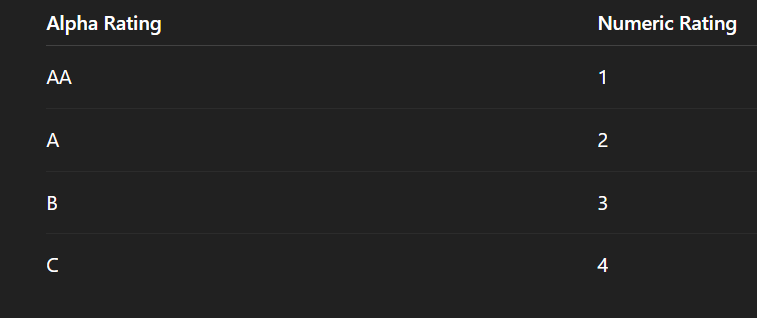


- Ease for Modeling

  -   Most regression and classification models need quantitative input.

  - ProsperRating (numeric) can be directly fed into models as a feature.

  - Using Alpha would require encoding, e.g., converting letters to numbers or one-hot vectors. Numeric already solves that.

In [471]:
df['ProsperRating (numeric)']

0         NaN
1         6.0
2         NaN
3         6.0
4         3.0
         ... 
113932    4.0
113933    6.0
113934    3.0
113935    4.0
113936    6.0
Name: ProsperRating (numeric), Length: 113937, dtype: float64

This is important to notice because it affects analysis and modeling.

1. What this output tells us

    - The column is of type float64, which is normal for numeric ratings with NaNs.

    - Many rows are missing values (NaN).

    - Values like 6.0, 3.0, 4.0 represent the numeric credit ratings, as expected.

2. Implications for modeling

- Machine learning models cannot handle NaN values directly.

- If you try to feed this column into a model without handling NaNs, you’ll get errors.

- You need to decide how to handle missing values, e.g.:

1. Drop rows with NaNs:
2. Impute missing values (replace NaN with mean, median, or a specific number):

In [472]:
# df = df.dropna(subset=['ProsperRating (numeric)'])

In [473]:
df['ProsperRating (numeric)'].fillna(df['ProsperRating (numeric)'].median(), inplace=True)

In [474]:
## check
df['ProsperRating (numeric)']

0         4.0
1         6.0
2         4.0
3         6.0
4         3.0
         ... 
113932    4.0
113933    6.0
113934    3.0
113935    4.0
113936    6.0
Name: ProsperRating (numeric), Length: 113937, dtype: float64

3. Why numeric is still chosen

 - Even with NaNs, the numeric version is preferred because:

 - After handling NaNs, it can go directly into models.

 - Alpha ratings would still need encoding, and the NaNs problem would remain.

In [475]:
df['ProsperRating (numeric)'].isnull().sum()

np.int64(0)

## **Univariate analysis**

<Axes: xlabel='ProsperRating (numeric)', ylabel='Count'>

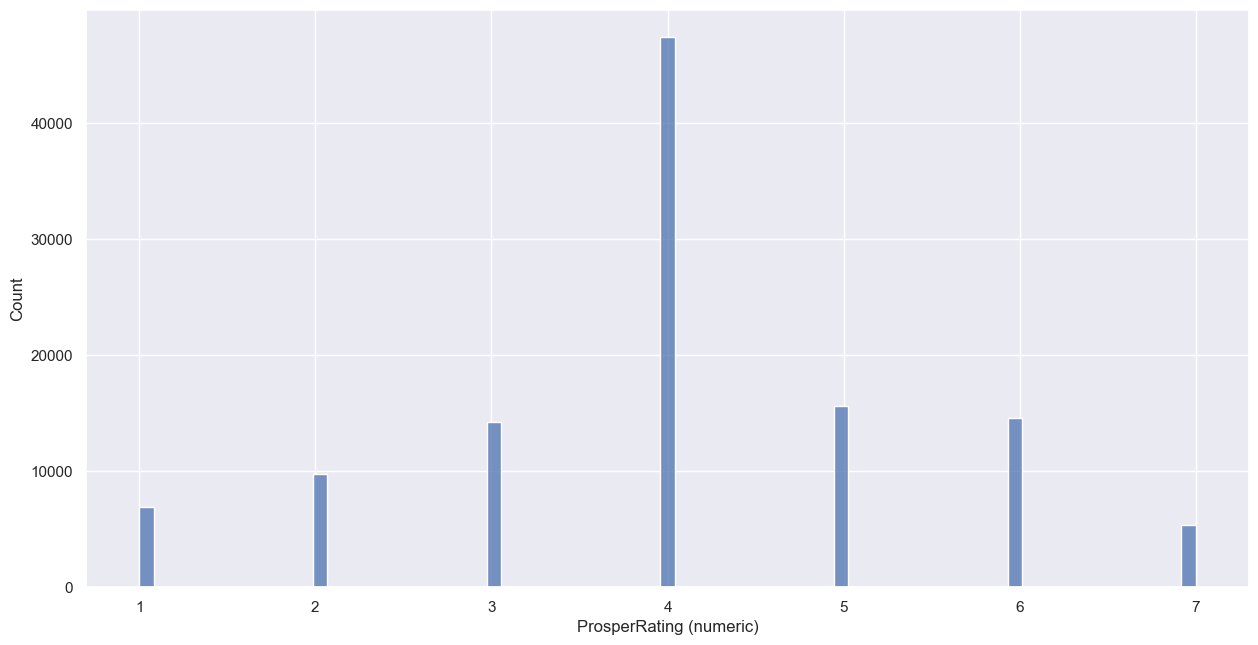

In [476]:
sns.histplot(data=df['ProsperRating (numeric)'])

Here
- X-axis (Horizontal): This represents the different numeric ProsperRatings, which are discrete values from 1 to 7.

- Y-axis (Vertical): This represents the "Count," or frequency, of each rating.

- Key Observations:

   - The distribution is not uniform. The counts for each rating are very different.

   - The rating of 4 has the highest frequency by a large margin, with a count of nearly 50,000.

   - Ratings 3, 5, and 6 have similar, moderate frequencies (around 14,000-15,000).

   - Ratings 1, 2, and 7 have the lowest frequencies.

In [477]:
df['ProsperScore']

0         NaN
1         7.0
2         NaN
3         9.0
4         4.0
         ... 
113932    5.0
113933    8.0
113934    3.0
113935    5.0
113936    7.0
Name: ProsperScore, Length: 113937, dtype: float64

1. Nature of ProsperScore

- ProsperScore is a numeric risk score assigned to borrowers by Prosper.

- Usually, higher scores mean lower risk, but you should check the dataset documentation to confirm.

- Like ProsperRating (numeric), it’s numeric with NaNs, making it suitable for modeling after handling missing values.

2. Difference from ProsperRating (numeric)
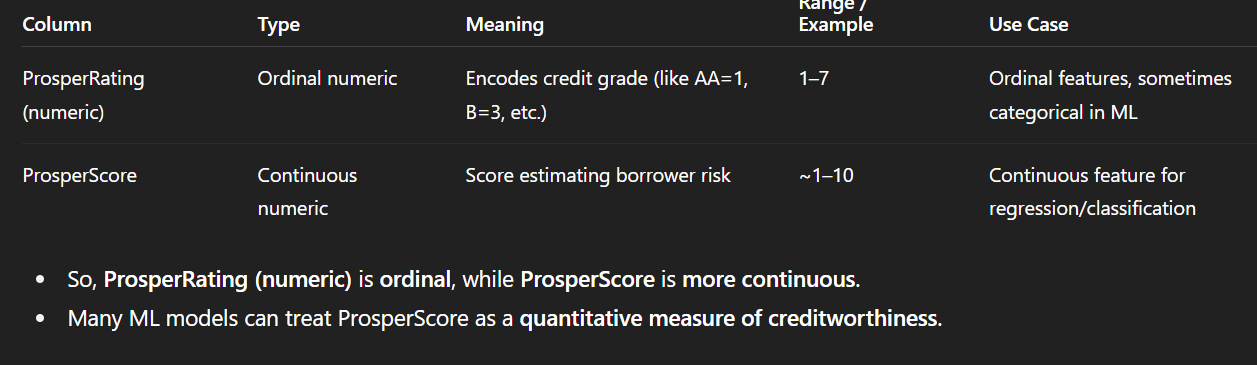

##### NaNs handling

In [478]:
# Check how many NaNs
df['ProsperScore'].isna().sum()

np.int64(29084)

In [479]:
# Fill NaNs with median
df['ProsperScore'].fillna(df['ProsperScore'].median(), inplace=True)

In [480]:
df['ProsperScore'].isna().sum()

np.int64(0)

4. Which one to choose?

- If you want a simple categorical credit grade → ProsperRating (numeric)

- If you want a more fine-grained numeric risk measure → ProsperScore

Often, people use both as features in a model after handling NaNs.

<Axes: xlabel='ProsperScore', ylabel='Count'>

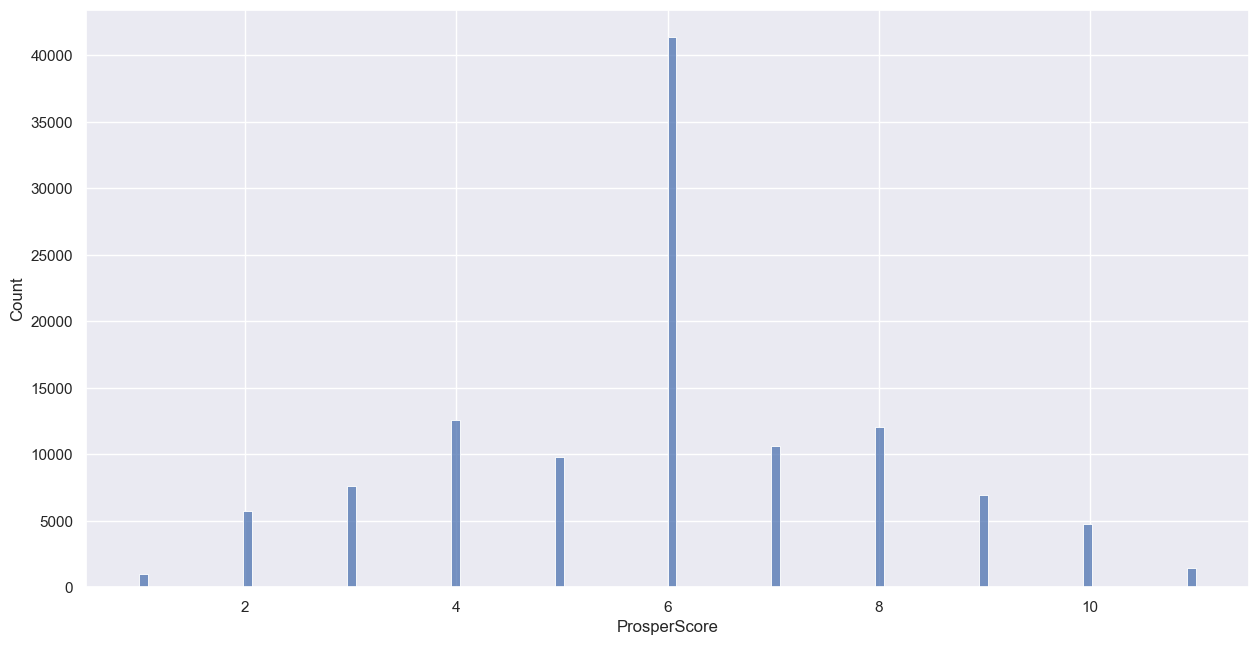

In [481]:
sns.histplot(data=df['ProsperScore'])

This is another histogram, this time showing the distribution of a variable called "ProsperScore

here 

- X-axis (Horizontal): This represents the "ProsperScore," which appears to be a numeric rating from 1 to 11.

- Y-axis (Vertical): This represents the "Count," or how many times each score appears in the dataset.

Key Observations:

- The distribution is highly concentrated in the middle.

- The ProsperScore of 6 is by far the most common, with a count of over 40,000.

- Scores of 4 and 8 are the next most frequent, both with counts over 12,000.

- The counts generally decrease as the score moves away from the peak (6) towards the extremes (1 and 11).

- The scores at the ends of the scale, 1 and 11, are the least frequent.

In [482]:
df["DebtToIncomeRatio"].isnull().sum()

np.int64(8554)

That tells you 8,554 missing values (NaNs) are present in the DebtToIncomeRatio column.

1. Meaning of the result

- Your dataset has 8,554 rows where DebtToIncomeRatio is missing.

- Since total length = 113,937, that’s about:

In [483]:
8554 / 113937 * 100 

7.507657740681253

So, roughly 7.5% missing data — not too bad.

2. What is DebtToIncomeRatio?
- It represents the ratio of a borrower’s debt payments to their income (typically a number between 0 and 1).
Example:
- If monthly debt = ₹30,000 and monthly income = ₹100,000 → DTI = 0.3 (30%).

This is an important predictor for credit risk or loan default — higher DTI → higher default probability.

3. How to handle these NaNs

- You have 3 main options depending on your modeling goal:

- Option 1: Drop missing rows : If you can afford to lose 7.5% of data:

In [484]:
# df = df.dropna(subset=['DebtToIncomeRatio'])

Option 2: Impute (recommended for most ML models)

- Fill missing values with a representative number:

In [485]:
df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].median(), inplace=True)

Option 3: Impute with group-based median (advanced)

- If DebtToIncomeRatio depends on factors like income range:

In [486]:
# df['DebtToIncomeRatio'] = df.groupby('IncomeRange')['DebtToIncomeRatio'].transform(lambda x: x.fillna(x.median()))

🧠 4. Why this matters

If you don’t handle NaNs:

- Models like Logistic Regression, DecisionTree, RandomForest will throw errors.

- EDA visualizations (like correlation or pairplots) will ignore those rows silently → misleading results.

Text(0.5, 1.0, 'Distribution of Debt-to-Income Ratio')

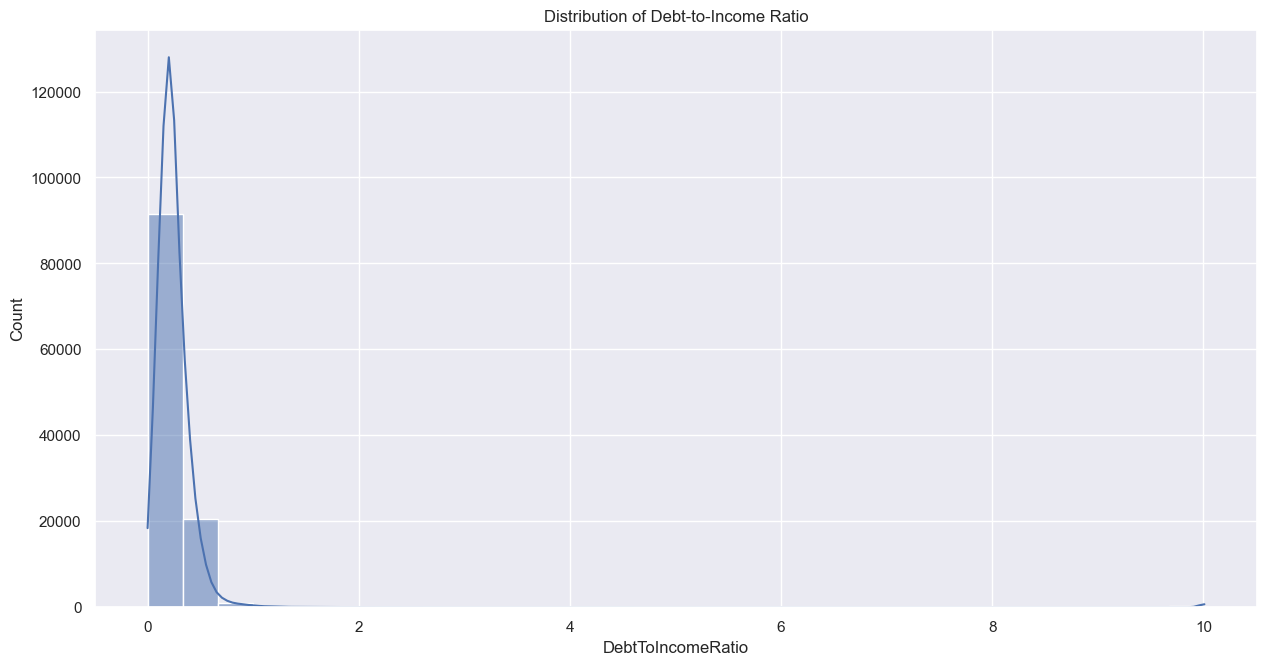

In [487]:
sns.histplot(df["DebtToIncomeRatio"], bins=30, kde=True)
plt.title("Distribution of Debt-to-Income Ratio")

- X-axis (Horizontal): This represents the "DebtToIncomeRatio." The scale goes from 0 up to 10.

- Y-axis (Vertical): This represents the "Count" of occurrences for each ratio range.

Key Observations:

- Highly Right-Skewed: The data is heavily concentrated on the far left, with a long "tail" extending to the right.
- Main Cluster: The vast majority of individuals in this dataset have a very low Debt-to-Income ratio, clustered between 0 and approximately 0.5. The peak of the distribution is very close to 0.
- Outliers: There are a few data points with much higher ratios (stretching towards 10), but these are very infrequent, as shown by the extremely small bars and the low-lying density curve on the right side of the chart.

Or move ahead to feature selection or model training safely.

In [488]:
#noticing that the row has both monthly income and monthly payment
df.loc[40]
df.loc[40, "MonthlyLoanPayment"], df.loc[40, "StatedMonthlyIncome"]

(np.float64(374.81), np.float64(12750.0))

🧠 1. What these values represent

- MonthlyLoanPayment = 374.81 → the borrower’s monthly payment obligation for their Prosper loan.

- StatedMonthlyIncome = 12750.0 → the borrower’s self-reported monthly income.

📉 2. How this connects to DTI

DTI (Debt-to-Income Ratio) is conceptually calculated as:

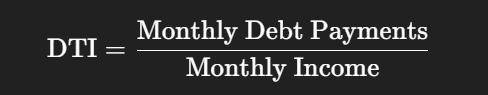

If we use this row as an example:

In [489]:
DTI=374.81/12750.0

In [490]:
DTI

0.029396862745098038

- That’s roughly 2.9%, which is quite low, meaning the borrower’s debt burden is small compared to income — a good sign for creditworthiness.

In [491]:
#noticing that all rows have both monthly income and monthly payment
df["MonthlyLoanPayment"].isnull().sum(), df["StatedMonthlyIncome"].isnull().sum()

(np.int64(0), np.int64(0))

In [492]:
df["IncomeVerifiable"][:10]

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: IncomeVerifiable, dtype: bool

1. Meaning of the column
- IncomeVerifiable is a boolean (True/False) column that indicates whether a borrower’s stated income was verified by Prosper.

- True → The borrower’s income was verified (e.g., via pay slips, tax documents, etc.)

- False → The borrower’s income was not verified, only self-reported. 

🧠 2. Interpretation of your output

- The first 10 rows are all True, which means:

- For those borrowers, the income values in StatedMonthlyIncome are trusted/verified.

- That’s a good sign for data quality — it means the income values you’re using to compute or analyze DebtToIncomeRatio are reliable for these rows.

 3. Why this column is useful

You can use IncomeVerifiable to:

In [493]:
#Calculate DebtToIncomeRatio for unverifiable incomes, adding $1 to account for $0/month incomes
df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / (df["StatedMonthlyIncome"] + 1), inplace = True)

df["DebtToIncomeRatio"].isnull().sum()

np.int64(0)

In [494]:
#Because APR is equal to the borrower rate + fees, let's calculate the median difference between the two, and add that value to the borrower rate of our data points missing an APR.
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
borrower_fees.median()

0.025019999999999987

In [495]:
df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.median(), inplace=True)

df["BorrowerAPR"].isnull().sum()

np.int64(0)

In [497]:
#EstimatedEffectiveYield will always be the borrower rate minus some expected loss from interest charge-offs and fees.
estimated_loss_from_fees = df["BorrowerRate"] - df["EstimatedEffectiveYield"]
fees_med=estimated_loss_from_fees.median()

df["EstimatedEffectiveYield"].fillna(df["BorrowerRate"] - fees_med, inplace=True)

df["EstimatedEffectiveYield"].isnull().sum()

np.int64(0)

In [499]:
#replacing the NaN values in the estimated loss by the median as it's hard to calculate it with a closed formula
df["EstimatedLoss"].fillna(df["EstimatedLoss"].median(), inplace=True)

df["EstimatedLoss"].isnull().sum()

np.int64(0)

In [501]:
#EstimatedReturn is defined as EstimatedEffectiveYield - EstimatedLoss.
df["EstimatedReturn"].fillna(df["EstimatedEffectiveYield"] - df["EstimatedLoss"], inplace=True)

df["EstimatedReturn"].isnull().sum()

np.int64(0)

In [503]:
df.dropna(
    subset=["EmploymentStatusDuration","CreditScoreRangeLower", "FirstRecordedCreditLine",
            "CurrentCreditLines","TotalCreditLinespast7years"],
    inplace=True
)

# Check the shape after dropping
df.shape


(106290, 81)

🧠 What this means:

- You started with 113,937 rows.

- You dropped 7,647 rows that had missing values in any of these critical columns:

["EmploymentStatusDuration","CreditScoreRangeLower", "FirstRecordedCreditLine",
 "CurrentCreditLines","TotalCreditLinespast7years"]


Remaining rows = 106,290 → still a large enough dataset for modeling.

Columns = 81 → unchanged.

In [504]:
df[["EmploymentStatusDuration","CreditScoreRangeLower","FirstRecordedCreditLine",
    "CurrentCreditLines","TotalCreditLinespast7years"]].isnull().sum()

EmploymentStatusDuration      0
CreditScoreRangeLower         0
FirstRecordedCreditLine       0
CurrentCreditLines            0
TotalCreditLinespast7years    0
dtype: int64

In [506]:
#filling NaN values in the columns related to prosper variables with 0's as they are hard to be filled with another value
#also their rows cannot be dropped as they are representing most of the dataset
prosper_vars = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

df[prosper_vars] = df[prosper_vars].fillna(0)

df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 81, dtype: int64

In [508]:
#dropping the two columns with the remaining irreplacable NaN values
#since the change in the score is dependent on prosper values which are mostly missing we are dropping it as it also makes no sense to be replaced with 0

df.drop("ScorexChangeAtTimeOfListing", axis=1, inplace=True)
df.drop("LoanFirstDefaultedCycleNumber", axis=1, inplace=True)


1. Why drop these columns

- ScorexChangeAtTimeOfListing

- Likely represents a score change at listing, which may be sparse, redundant, or not useful for modeling.

- LoanFirstDefaultedCycleNumber

- Probably applies only to borrowers who defaulted; if your target is predicting default, it would leak future information and should be removed.

Dropping them is the right choice to avoid data leakage and simplify your feature set.

In [509]:
df.shape


(106290, 79)

In [512]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], errors='coerce')

In [513]:
df[df['ListingCreationDate'].isna()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
101,0F6A3407615179140F880BF,254944,NaT,E,36,Chargedoff,2010-03-10 00:00:00,0.20421,0.1895,0.1795,...,-40.04,0.0,1465.36,1465.36,0.0,1.0,1,0,0.0,91
316,30B33555784623222BD00DF,623384,NaT,Unknown,36,Current,Unknown,0.35797,0.3177,0.3077,...,-50.15,0.0,0.00,0.00,0.0,1.0,0,0,0.0,34
534,3BE835801695340942E82D5,794753,NaT,Unknown,36,Current,Unknown,0.31790,0.2786,0.2686,...,-21.94,0.0,0.00,0.00,0.0,1.0,0,0,0.0,66
1045,2E313548753881356636FC1,599619,NaT,Unknown,36,Chargedoff,2012-12-22 00:00:00,0.35797,0.3177,0.3077,...,-3.29,0.0,3930.74,3930.74,0.0,1.0,0,0,0.0,32
1218,0A50341941817706285EAF8,311111,NaT,D,36,Chargedoff,2009-05-24 00:00:00,0.17677,0.1550,0.1450,...,-46.53,0.0,5781.92,5781.42,0.0,1.0,1,1,50.0,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112390,D21634314661818880AE4A9,394935,NaT,D,36,Completed,2011-09-18 00:00:00,0.18183,0.1600,0.1500,...,-88.00,0.0,0.00,0.00,0.0,1.0,1,1,2650.0,26
112717,C52F3426964405073574757,369381,NaT,A,36,Completed,2010-10-13 00:00:00,0.01315,0.0000,-0.0100,...,-36.83,0.0,0.00,0.00,0.0,1.0,0,1,3000.0,1
112980,E9F13388334517098340896,128767,NaT,C,36,Completed,2010-05-26 00:00:00,0.16657,0.1594,0.1494,...,-66.67,0.0,0.00,0.00,0.0,1.0,0,0,0.0,53
113573,DF87342194034803036E12C,341407,NaT,HR,36,Chargedoff,2009-01-05 00:00:00,0.37453,0.3500,0.3400,...,-5.61,0.0,2935.36,2935.36,0.0,1.0,0,0,0.0,37


In [514]:
df.dropna(subset=['ListingCreationDate'], inplace=True)

In [515]:
df['date'] = df['ListingCreationDate'].dt.date
df['year'] = df['ListingCreationDate'].dt.year
df['month'] = df['ListingCreationDate'].dt.month

df['date'] = pd.to_datetime(df['date'])
df.drop(['ListingCreationDate'], axis=1, inplace=True)


In [517]:
df['month'].unique()

array([ 8,  2, 10,  9, 12,  4,  5,  7, 11,  1,  6,  3], dtype=int32)

In [519]:
df['year'].unique()

array([2007, 2014, 2012, 2013, 2010, 2011, 2008, 2009], dtype=int32)

In [520]:
df['date'].unique()

<DatetimeArray>
['2007-08-26 00:00:00', '2014-02-27 00:00:00', '2012-10-22 00:00:00',
 '2013-09-14 00:00:00', '2013-12-14 00:00:00', '2013-04-12 00:00:00',
 '2013-05-05 00:00:00', '2013-12-02 00:00:00', '2012-05-10 00:00:00',
 '2007-10-09 00:00:00',
 ...
 '2009-12-12 00:00:00', '2009-05-01 00:00:00', '2008-10-12 00:00:00',
 '2008-10-08 00:00:00', '2009-05-05 00:00:00', '2009-05-03 00:00:00',
 '2010-08-29 00:00:00', '2009-12-26 00:00:00', '2010-12-25 00:00:00',
 '2010-09-05 00:00:00']
Length: 2320, dtype: datetime64[ns]

In [521]:
# Convert 'LoanOriginationDate' type from str to datetime 
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['ListingNumber']=df['ListingNumber'].astype(str)
df['ProsperScore']=df['ProsperScore'].astype(int)


In [522]:
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

In [523]:
#creating a new column by replacing the numbers in the listing category with their references
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(list_dict)
#loan_data.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [524]:
df[['ListingCategory (numeric)', 'ListingCategory']].head(10)


,ListingCategory (numeric),ListingCategory
0,0,Not Available
1,2,Home Improvement
3,16,Motorcycle
4,2,Home Improvement
5,1,Debt Consolidation
6,1,Debt Consolidation
7,2,Home Improvement
8,7,Other
9,7,Other
10,1,Debt Consolidation


In [525]:
df['ListingCategory'].isnull().sum()


np.int64(0)

Encode for modeling:
- If using ML models, you can do:

In [526]:
pd.get_dummies(df['ListingCategory'], drop_first=True)

,Baby&Adoption,Boat,Business,Cosmetic Procedure,Debt Consolidation,Engagement Ring,Green Loans,Home Improvement,Household Expenses,Large Purchases,Medical/Dental,Motorcycle,Not Available,Other,Personal Loan,RV,Student Use,Taxes,Vacation,Wedding Loans
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
113934,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='count', ylabel='ListingCategory'>

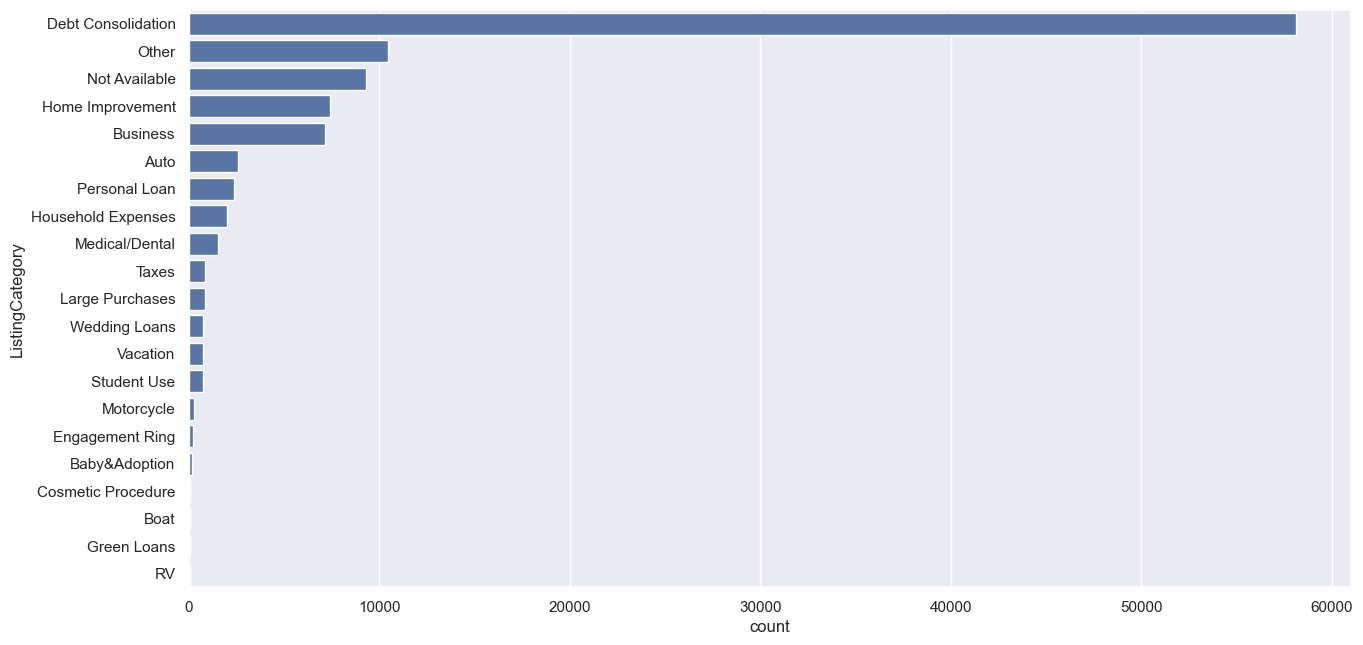

In [527]:
import seaborn as sns
sns.countplot(y='ListingCategory', data=df, order=df['ListingCategory'].value_counts().index)


In [528]:
#dropping IDs that won't matter in the analysis as they are admin stuff
df.drop(["ListingNumber", "LoanKey", "LoanNumber", "MemberKey"], axis=1, inplace=True)

In [529]:
df.columns

Index(['ListingKey', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
     

In [530]:
df.select_dtypes(include='object').columns

Index(['ListingKey', 'CreditGrade', 'LoanStatus', 'ClosedDate',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanOriginationQuarter',
       'ListingCategory'],
      dtype='object')

In [531]:
#dropping the dates
df.drop(["ClosedDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter"], axis=1, inplace=True)

 Why this is a reasonable step

- These columns mostly contain timestamps of events that either:

- Have already been captured in other features (e.g., year, month)

- Are not directly useful for predicting loan outcomes

- Keeping them could introduce redundancy or data leakage if the dates imply future events.

2. Effect on DataFrame

- Columns removed → fewer, cleaner features

- Rows remain unchanged

- Focus shifts to numeric and categorical predictive features

In [532]:
df.select_dtypes(include='object').columns

Index(['ListingKey', 'CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)',
       'BorrowerState', 'Occupation', 'EmploymentStatus', 'GroupKey',
       'FirstRecordedCreditLine', 'IncomeRange', 'ListingCategory'],
      dtype='object')

In [533]:
df.select_dtypes(include='number').columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperP

In [534]:
# #dropping another set of columns as they are unrelated to our analysis.
# #they are related to current loans at the present so they are beyond our scope of analysis
#df.drop(["LoanCurrentDaysDelinquent", "LoanMonthsSinceOrigination", "LP_CustomerPayments",
#          "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
#          "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments"], axis=1, inplace=True)
df.drop(["LoanCurrentDaysDelinquent"],axis=1, inplace=True)


1. Why dropping this column makes sense

- LoanCurrentDaysDelinquent reflects the current status of a loan, which is not known at the time of loan origination.

- Including it would be data leakage if your goal is to predict loan outcomes (like default) using information available at listing time.

- Dropping it keeps your model honest and predictive only on available information.

In [535]:
df.columns

Index(['ListingKey', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', '

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105935 entries, 0 to 113936
Data columns (total 73 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           105935 non-null  object        
 1   CreditGrade                          105935 non-null  object        
 2   Term                                 105935 non-null  int64         
 3   LoanStatus                           105935 non-null  object        
 4   BorrowerAPR                          105935 non-null  float64       
 5   BorrowerRate                         105935 non-null  float64       
 6   LenderYield                          105935 non-null  float64       
 7   EstimatedEffectiveYield              105935 non-null  float64       
 8   EstimatedLoss                        105935 non-null  float64       
 9   EstimatedReturn                      105935 non-null  float64       
 10  P

In [537]:
# Count total rows in each column which contain null values
df.isnull().sum()

ListingKey         0
CreditGrade        0
Term               0
LoanStatus         0
BorrowerAPR        0
                  ..
Investors          0
date               0
year               0
month              0
ListingCategory    0
Length: 73, dtype: int64

In [538]:
# 'StatedMonthlyIncome' is enough
df.drop(['IncomeRange'], axis=1, inplace=True)

1. Why this makes sense

- StatedMonthlyIncome already provides the numerical value of income, which is more precise than the categorical IncomeRange.

- Keeping both would be redundant, and categorical ranges may lose information compared to exact numbers.

2. Effect on dataset

- Fewer columns → cleaner feature set

- No loss of predictive information, since StatedMonthlyIncome is already available

In [539]:
df.select_dtypes(include='object').columns

Index(['ListingKey', 'CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)',
       'BorrowerState', 'Occupation', 'EmploymentStatus', 'GroupKey',
       'FirstRecordedCreditLine', 'ListingCategory'],
      dtype='object')

In [540]:
df.select_dtypes(include='number').columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperP

<Axes: xlabel='count', ylabel='LoanStatus'>

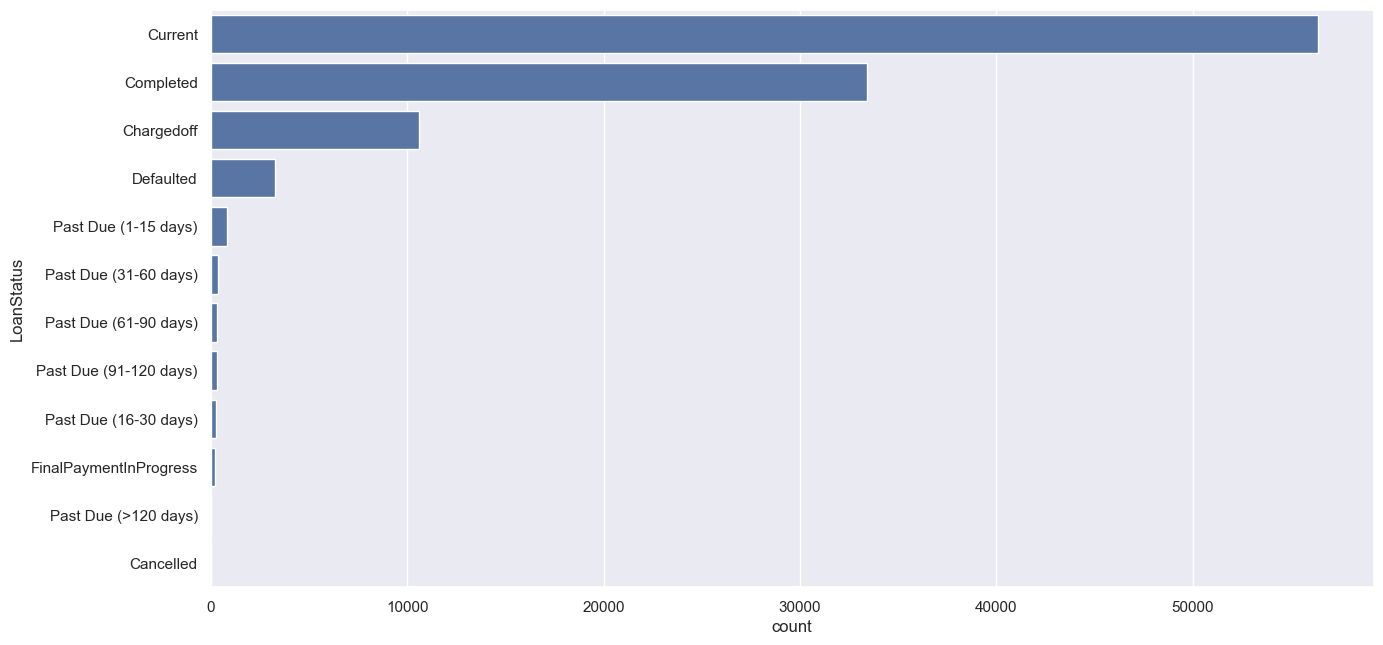

In [541]:
# Order the categorical variable 
status_order=df.LoanStatus.value_counts().index

# Plot 
sns.countplot(data=df, y='LoanStatus', order=status_order)

- Y-axis (Vertical): This lists the different categories for "LoanStatus."

- X-axis (Horizontal): This shows the "count," or frequency, for each status.

Key Observations:

Dominant Statuses: The overwhelming majority of loans are in the "Current" status (over 55,000), followed by "Completed" (around 34,000).

Negative Outcomes: "Chargedoff" is the third most common status (around 11,000), followed by "Defaulted" (around 4,000-5,000).

Rare Statuses: All other categories, including various "Past Due" stages, "FinalPaymentInProgress," and "Cancelled," have very low counts and are relatively rare in this dataset.

In [543]:
df["LoanStatus"].value_counts()

LoanStatus
Current                   56381
Completed                 33419
Chargedoff                10592
Defaulted                  3278
Past Due (1-15 days)        806
Past Due (31-60 days)       362
Past Due (61-90 days)       308
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     1
Name: count, dtype: int64

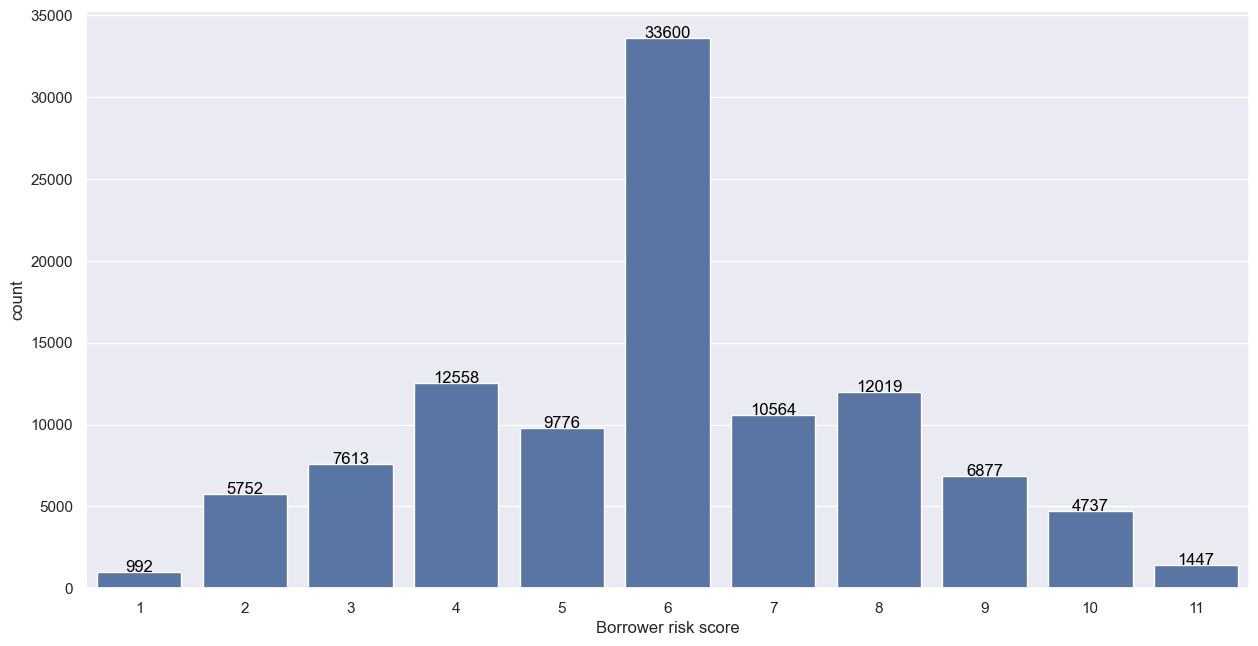

In [544]:
sns.countplot(data=df, x='ProsperScore');
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = df['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

- X-axis (Horizontal): This represents the "Borrower risk score," which ranges from 1 to 11.

- Y-axis (Vertical): This represents the "count," or frequency, of each score. The exact count is labeled on top of each bar.

Key Observations:

Peak of the Distribution: The most common risk score is 6, with a high count of 33,600.

General Shape: The distribution is unimodal (has one peak) and is centered around the middle scores. It roughly resembles a bell curve, though it's not perfectly symmetrical.

Other Frequent Scores: Scores 4 (12,558), 8 (12,019), and 7 (10,564) are also very common.

Low Frequency Scores: The scores at the extremes, 1 (992) and 11 (1,447), are the least frequent, indicating that very low and very high-risk scores are rare in this dataset.

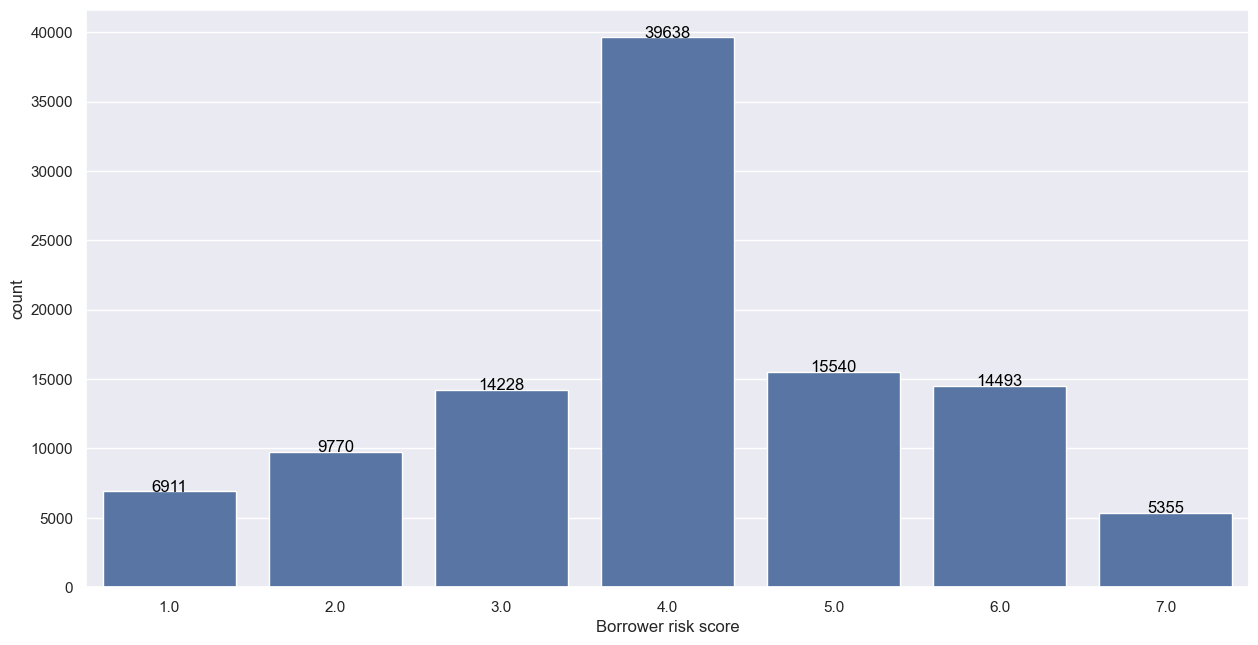

In [547]:
sns.countplot(data=df, x='ProsperRating (numeric)');
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = df['ProsperRating (numeric)'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')




X-axis (Horizontal): Shows the "Borrower risk score," which ranges from 1.0 to 7.0.

Y-axis (Vertical): Shows the "count," or frequency, of each score. The exact counts are labeled on top of the bars.

Key Observations:

The distribution is highly concentrated at a score of 4.0, which is by far the most frequent with a count of 39,638.

Scores 3.0 (14,228), 5.0 (15,540), and 6.0 (14,493) are the next most common and have similar frequencies.

The scores at the ends of this range, 1.0 (6,911) and 7.0 (5,355), are the least frequent.

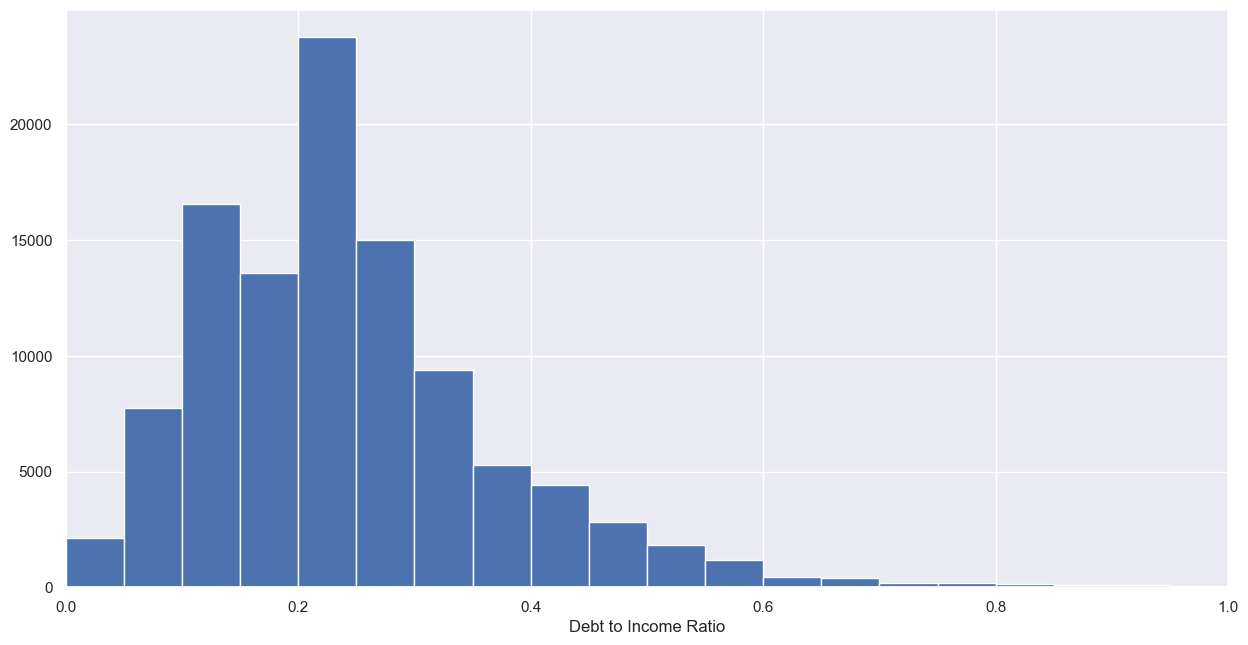

In [548]:
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);

This is a histogram showing the distribution of the "Debt to Income Ratio," likely after filtering out the extreme outliers (e.g., those greater than 1.0) that were visible in a previous chart. This "zoomed-in" view gives a much clearer picture of the main data cluster.

Key Observations:

Distribution Shape: The distribution is right-skewed.

Peak (Mode): The most common Debt to Income Ratio is in the 0.20 to 0.25 range, which is the highest bar with a count over 22,500.

Concentration: Most of the data is concentrated between 0.10 and 0.35.

Tail: After the peak, the counts steadily decrease as the ratio approaches 1.0, forming a "tail" to the right.

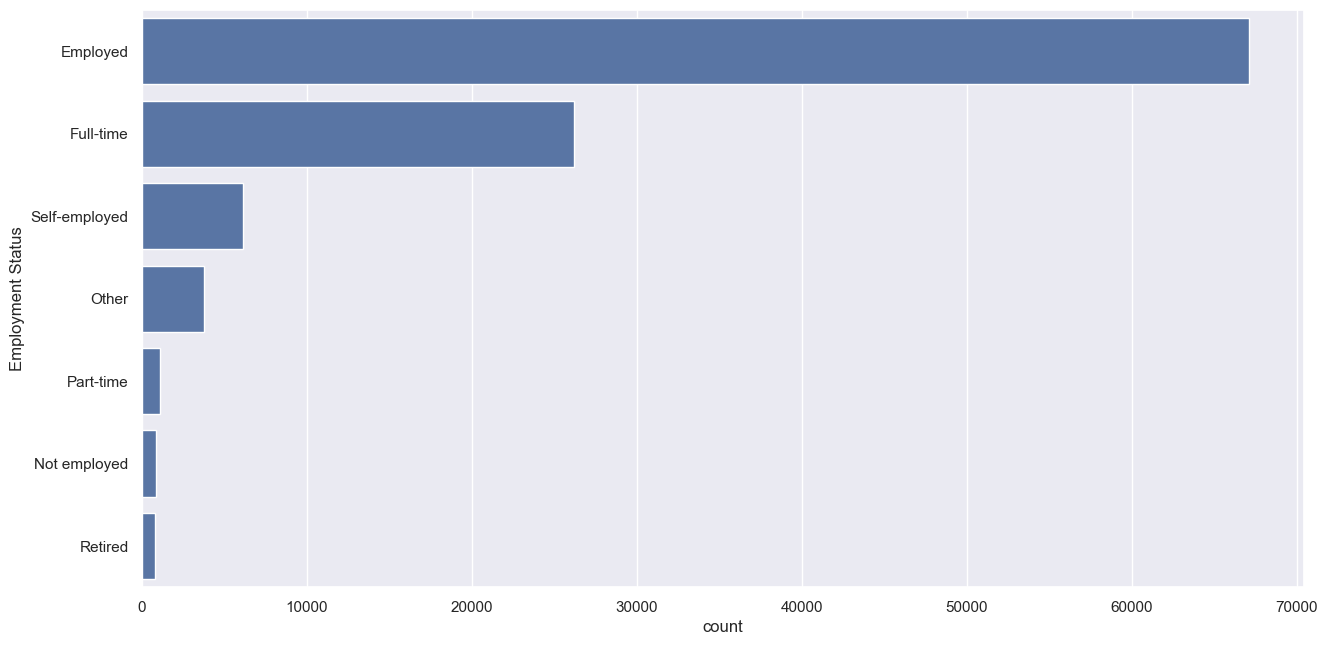

In [549]:
status_empl=df.EmploymentStatus.value_counts().index
sns.countplot(data=df, y='EmploymentStatus', order=status_empl)
plt.ylabel('Employment Status');

"Employment Status."

Y-axis (Vertical): Lists the different categories of employment status.

X-axis (Horizontal): Shows the "count," or frequency, for each status.

Key Observations:

"Employed" is by far the most common status, with a count of nearly 70,000.

"Full-time" is the second most common status, with a count of approximately 27,000.

"Self-employed" and "Other" follow, with significantly lower counts.

"Part-time," "Not employed," and "Retired" are the least common statuses, each having a very low frequency in this dataset.

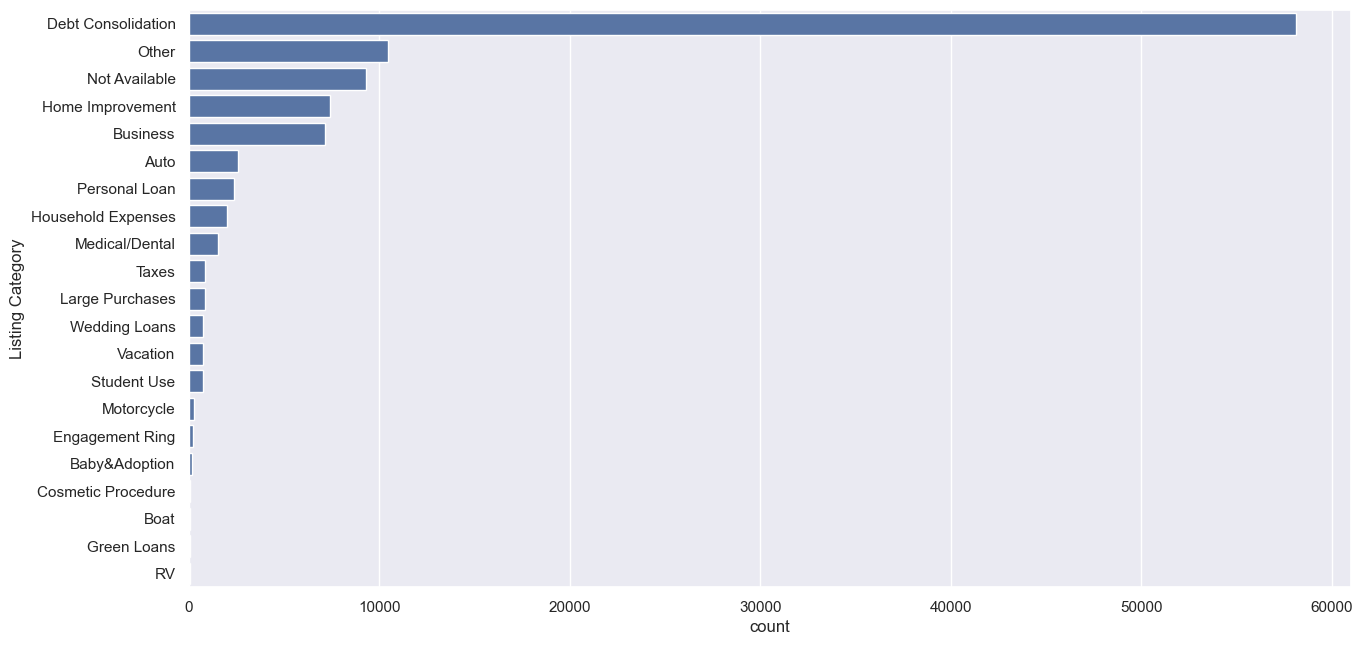

In [550]:
categ_order = df['ListingCategory'].value_counts().index
listing_counts = df['ListingCategory'].value_counts()
sns.countplot(data = df, y = 'ListingCategory', order=categ_order)
plt.ylabel('Listing Category');

This is a horizontal bar chart showing the distribution of the "Listing Category," which represents the stated reason for the loan.

Y-axis (Vertical): Lists the various loan categories.

X-axis (Horizontal): Shows the "count," or frequency, of each category.

This is a horizontal bar chart showing the distribution of the "Listing Category," which represents the stated reason for the loan.

Y-axis (Vertical): Lists the various loan categories.

X-axis (Horizontal): Shows the "count," or frequency, of each category.

Key Observations:

Dominant Category: "Debt Consolidation" is by far the most common reason for a loan, with a count approaching 60,000.

Significant Drop: There is a large gap between the top category and the next most common ones.

Second Tier: "Other," "Not Available," "Home Improvement," and "Business" form the next group, with counts all falling roughly between 8,000 and 12,000.

Long Tail: The vast majority of other categories (e.g., "Auto," "Personal Loan," "Medical/Dental," "Student Use") are much less frequent. Many categories at the bottom, like "RV," "Green Loans," and "Boat," are very rare.

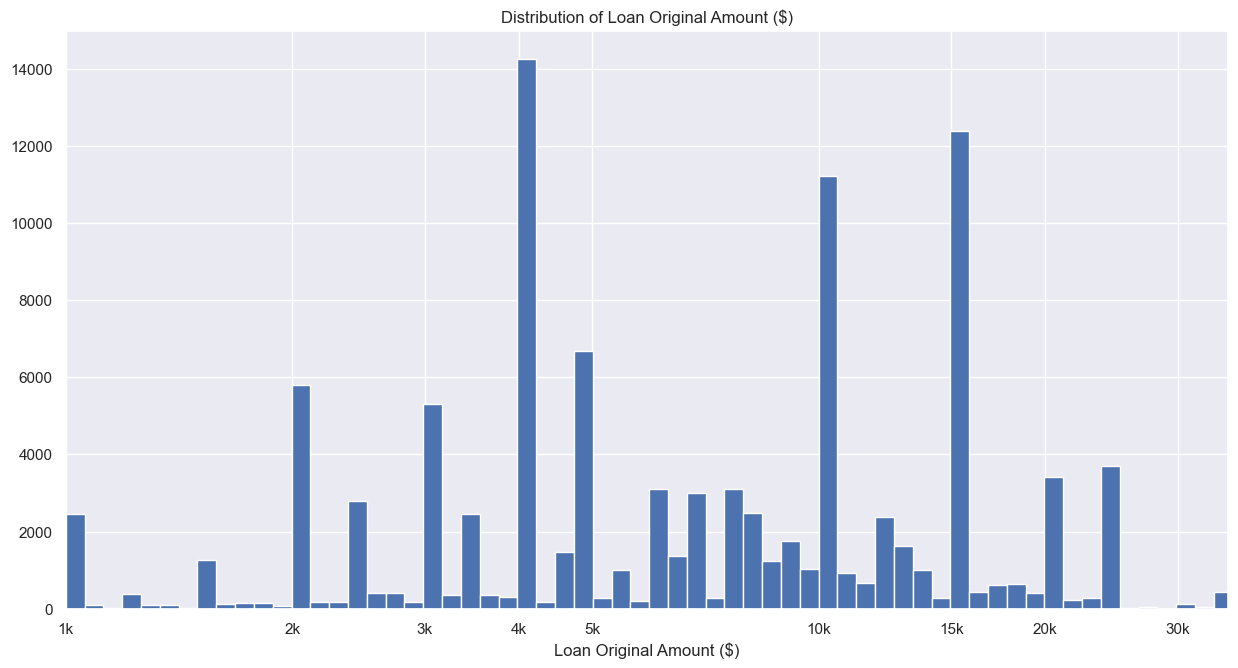

In [551]:
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

This is a histogram showing the "Distribution of Loan Original Amount ($)".

X-axis (Horizontal): This represents the "Loan Original Amount ($)" in thousands (e.g., 1k = $1,000, 5k = $5,000).

Y-axis (Vertical): This represents the "Count" or frequency of loans for each amount.

This is a histogram showing the "Distribution of Loan Original Amount ($)".

X-axis (Horizontal): This represents the "Loan Original Amount ($)" in thousands (e.g., 1k = $1,000, 5k = $5,000).

Y-axis (Vertical): This represents the "Count" or frequency of loans for each amount.

Key Observations:

Multi-modal Distribution: This is the most important feature. Instead of a smooth curve, the chart has multiple distinct peaks. This strongly suggests that borrowers tend to request specific, rounded loan amounts rather than arbitrary ones.

Most Popular Loan Amounts (The Peaks):

The most common loan amount is $4,000, with the highest peak (over 14,000).

The second most common is $15,000 (over 12,000).

The third most common is $10,000 (over 11,000).

Other Popular Amounts: Other significant peaks are visible at $2,000, $3,000, $5,000, $20,000, and $25,000 (the peak between 20k and 30k).

"Clumping": The data is "clumped" around these popular figures, with very few loans for amounts in between (e.g., $4,500 or $11,000).

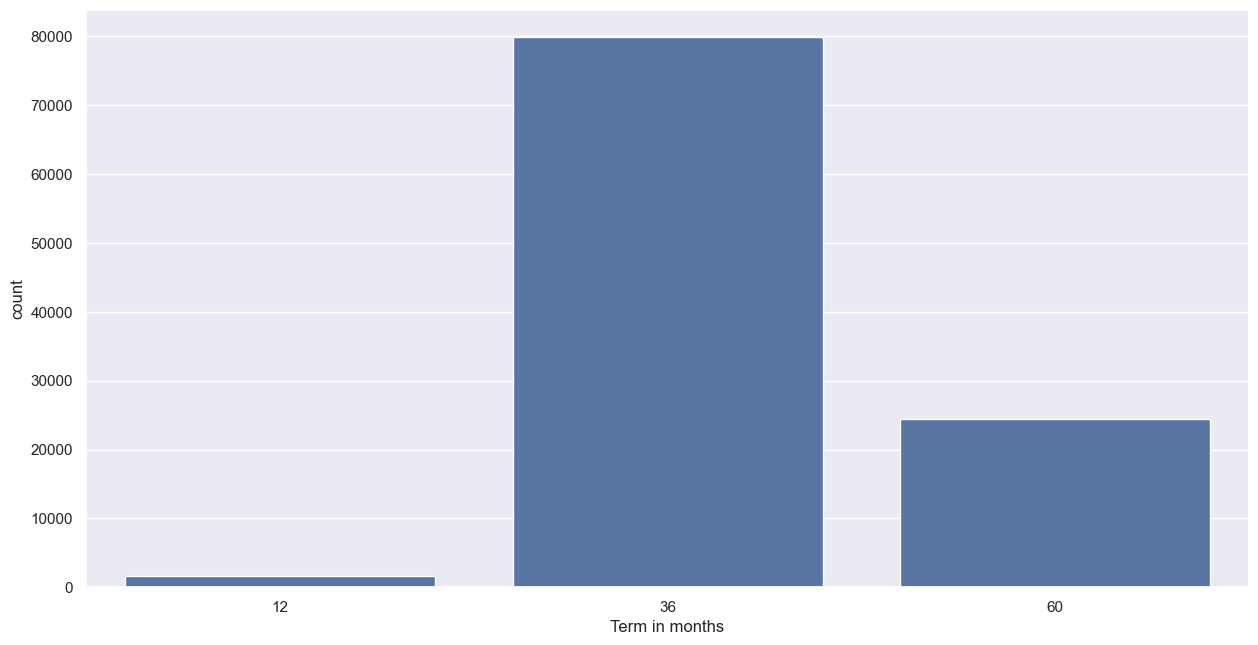

In [552]:
# Plot term of loans
#most loans are medium term loans 3 years
sns.countplot(data=df, x='Term')
plt.xlabel('Term in months');

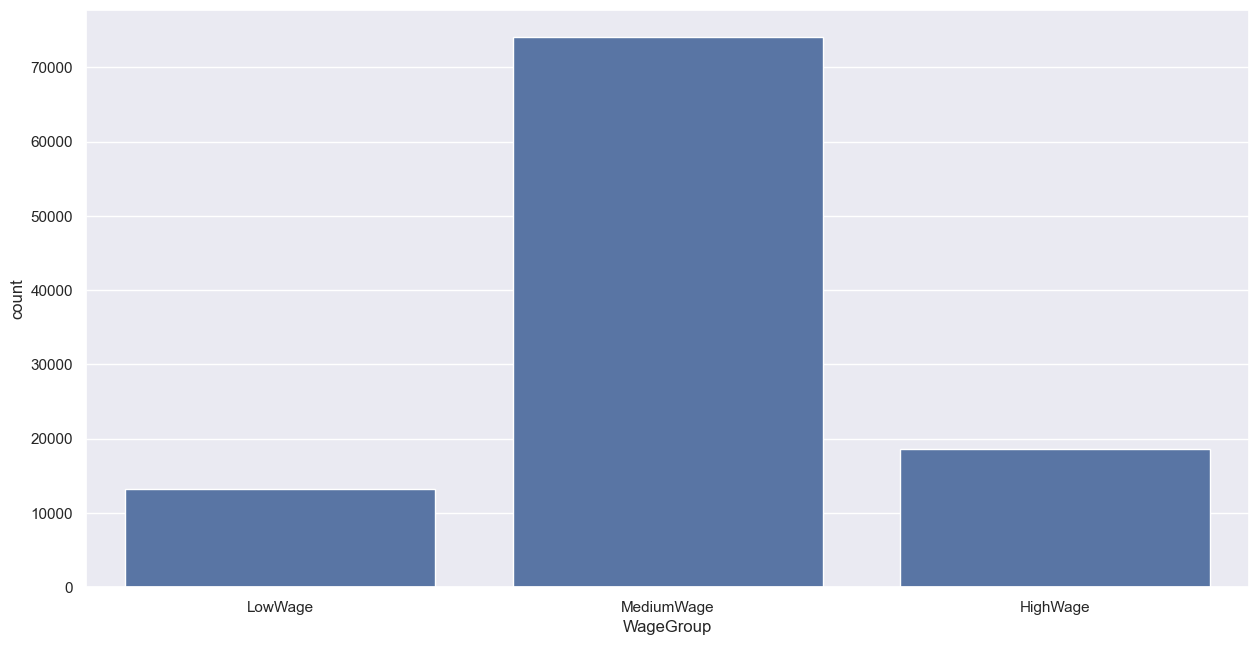

In [156]:
# define a classification function
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'LowWage'
    if row["StatedMonthlyIncome"]<8000:
        return 'MediumWage'
    else:
        return 'HighWage'
    
df['WageGroup'] = df.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['LowWage', 'MediumWage', 'HighWage']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df['WageGroup'] = df['WageGroup'].astype(ordered_variabl)

# Plot the new variable
sns.countplot(data = df, x = 'WageGroup');

This is a bar chart showing the distribution of a categorical variable called "WageGroup."

X-axis (Horizontal): This shows the three different wage groups: "LowWage," "MediumWage," and "HighWage."

Y-axis (Vertical): This shows the "count," or frequency, of individuals in each group.

Key Observations:

The "MediumWage" group is by far the largest, with a count of over 70,000.

The "LowWage" and "HighWage" groups are much smaller and have similar, but not identical, counts.

"LowWage" has a count of approximately 13,000.

"HighWage" has a count of approximately 18,000.


# **Bivariate analysis**

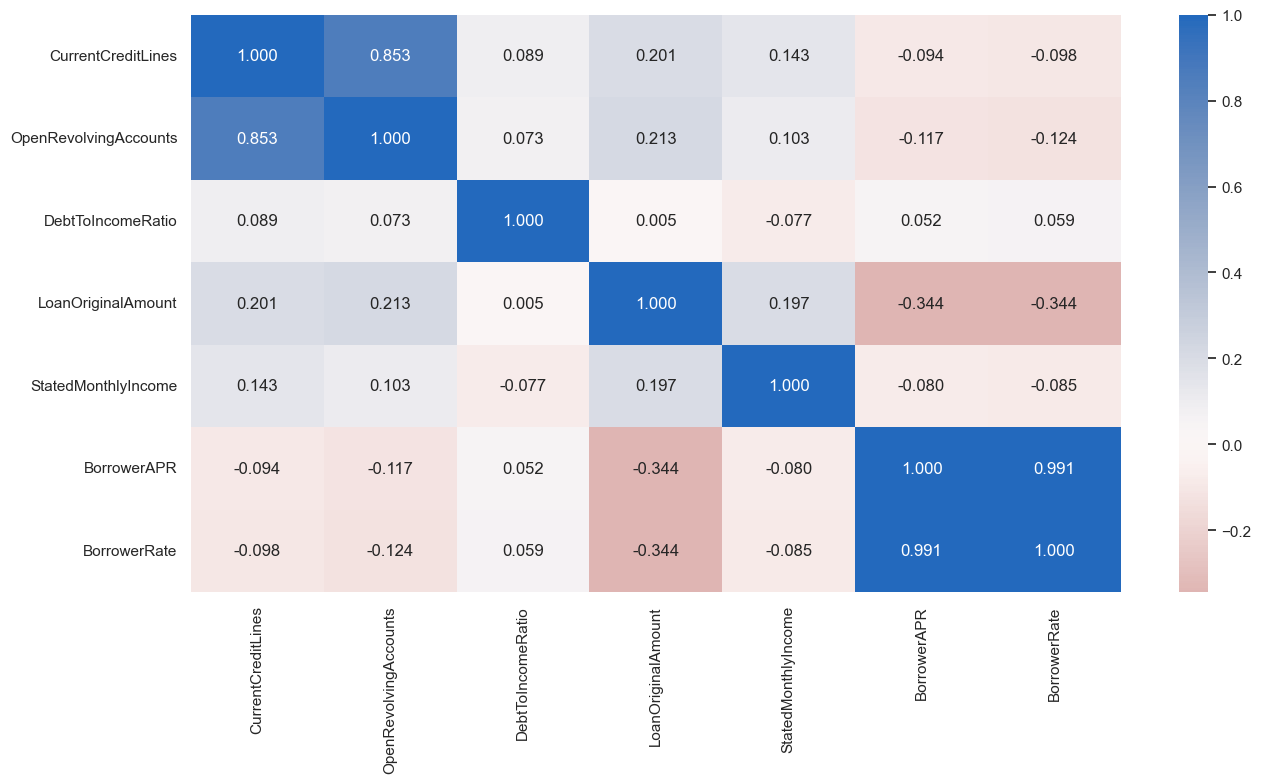

In [553]:
# Numerical features
numeric_vars = [ 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']
# correlation plot
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center=0)
plt.show()

This image is a correlation heatmap. It's a powerful visualization that shows the strength and direction of a linear relationship between pairs of variables.

Here’s how to read it:

Variables: The chart compares seven different variables (like LoanOriginalAmount, BorrowerAPR, etc.) against each other.

Color:

Dark Blue (Positive): As one variable goes up, the other tends to go up. The closer to 1.000, the stronger the positive relationship.

Red (Negative): As one variable goes up, the other tends to go down.

White/Light Gray (Near Zero): There is little to no linear relationship between the variables.

Numbers: The numbers in each square are the correlation coefficients, which range from -1 to 1.

Key Insights from the Chart:
Near-Perfect Correlation (Multicollinearity):

BorrowerAPR and BorrowerRate have a correlation of 0.991. This means they are almost identical. For building a predictive model, you would definitely remove one of them to avoid multicollinearity.

Strong Positive Correlation:

CurrentCreditLines and OpenRevolvingAccounts have a strong positive correlation of 0.853. This makes sense: borrowers with more credit lines are likely to have more revolving accounts open.

Moderate Negative Correlation:

LoanOriginalAmount and BorrowerAPR/BorrowerRate have a negative correlation of -0.344. This is a key finding: Larger loans tend to have lower interest rates (APR).

Weak/No Correlations:

DebtToIncomeRatio shows very weak correlations with most other variables. For example, its relationship with LoanOriginalAmount is only 0.005, and with StatedMonthlyIncome it's -0.077. This suggests that, in this dataset, a borrower's DTI doesn't have a strong linear relationship with how much they earn or how much they borrow.

StatedMonthlyIncome also has a very weak negative relationship with the interest rates (approx. -0.08), suggesting income isn't a strong driver of the rate.

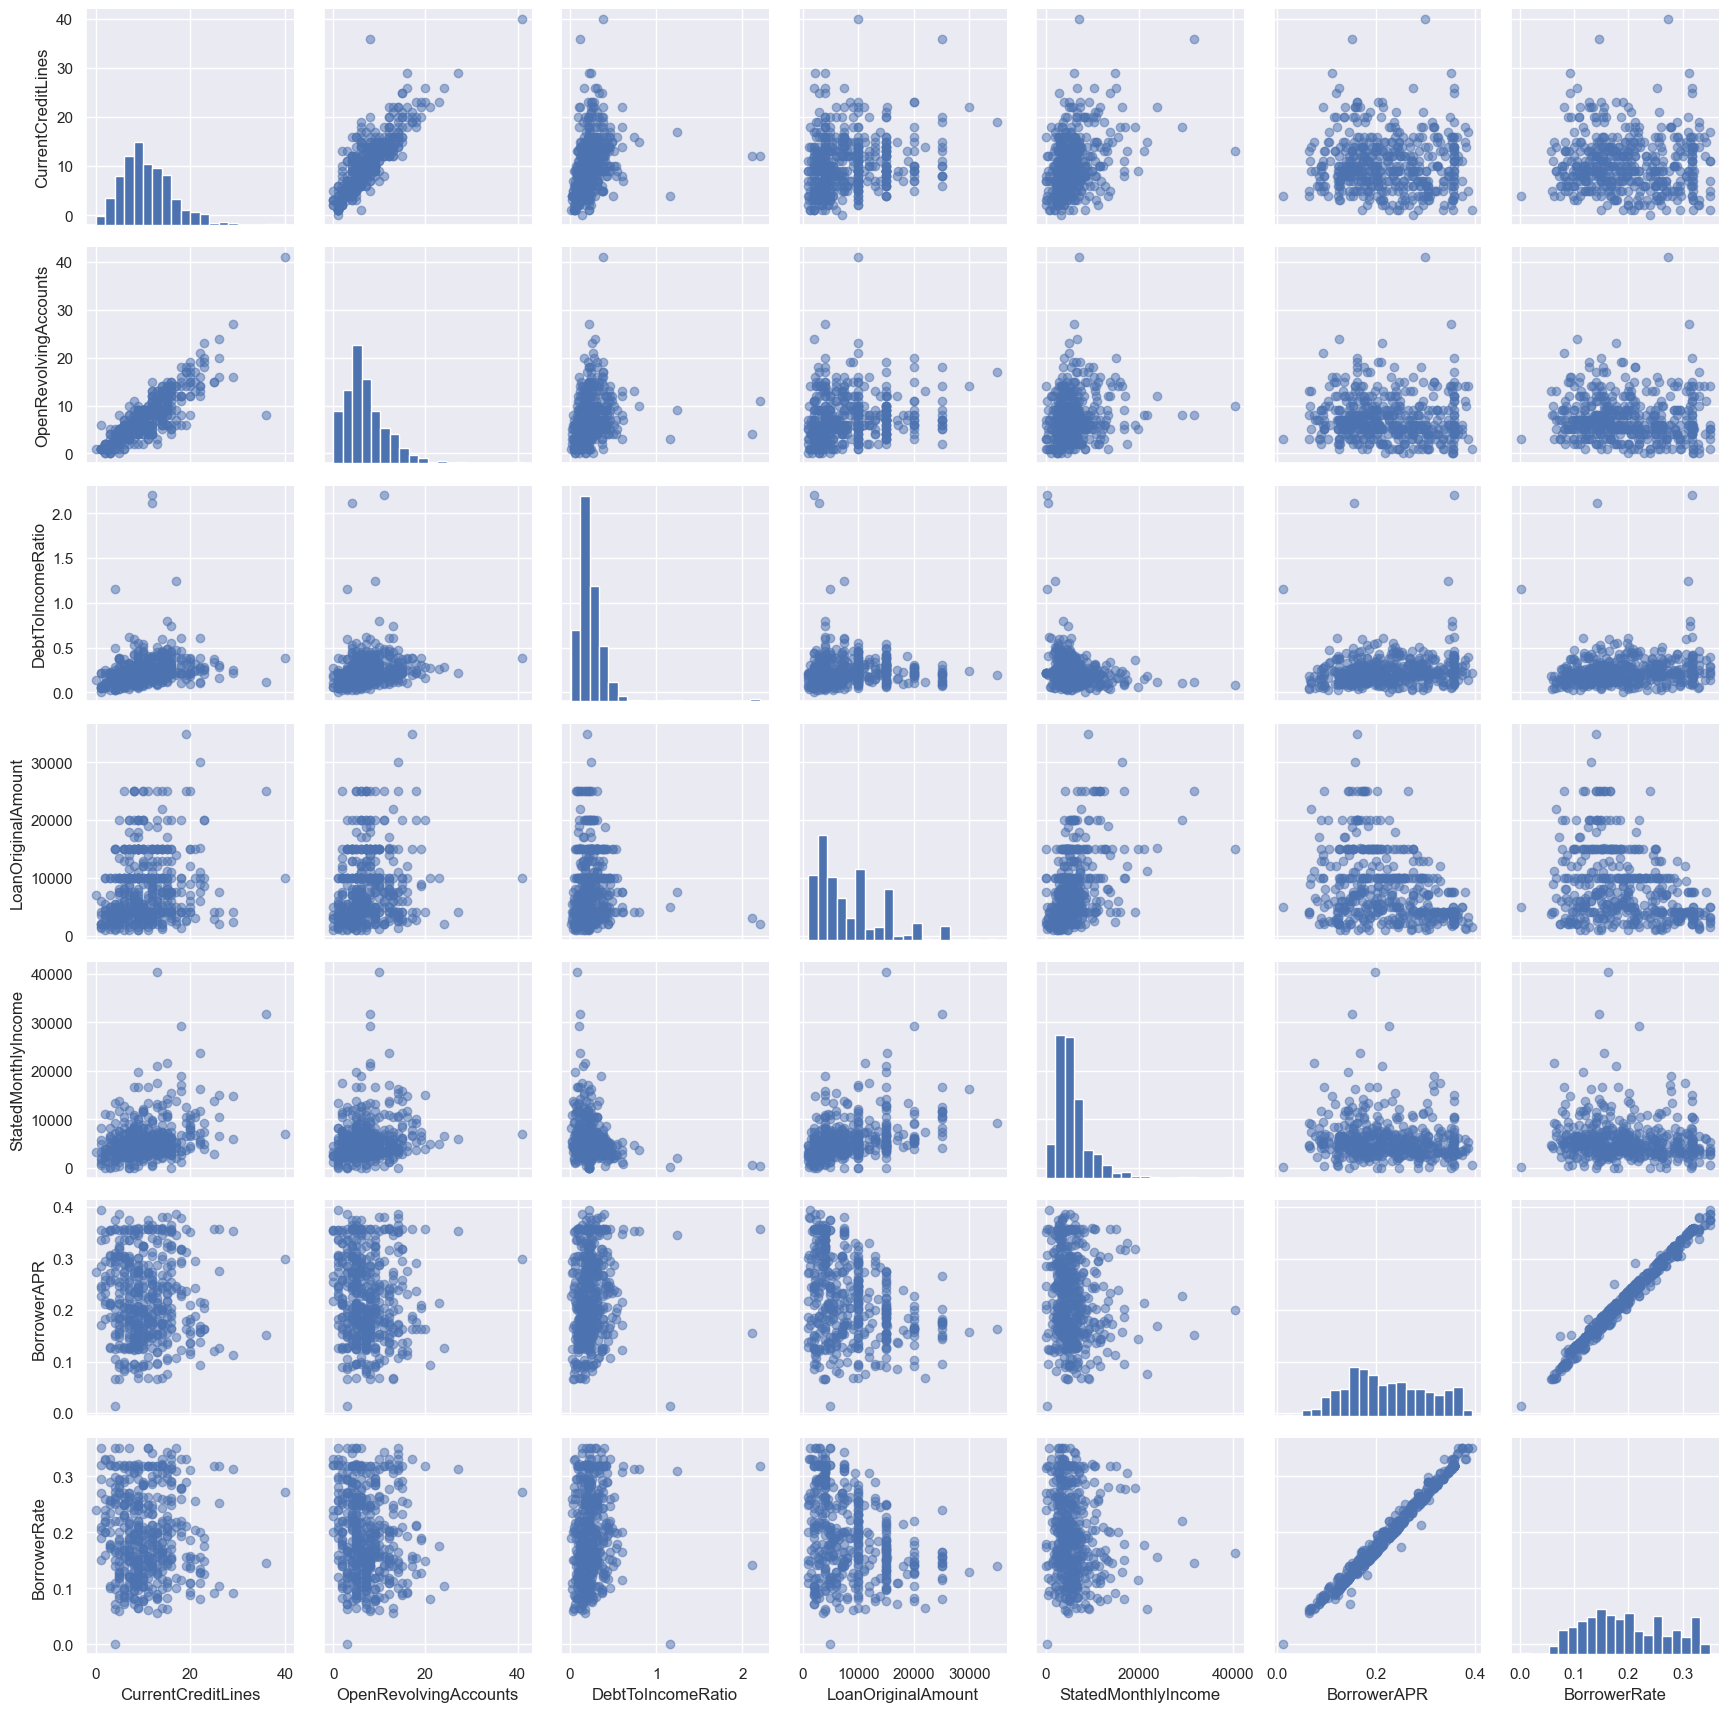

In [554]:
# plot matrix: sample 500 loans so that plots are clearer
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.reindex(samples)

# pair grid
g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);

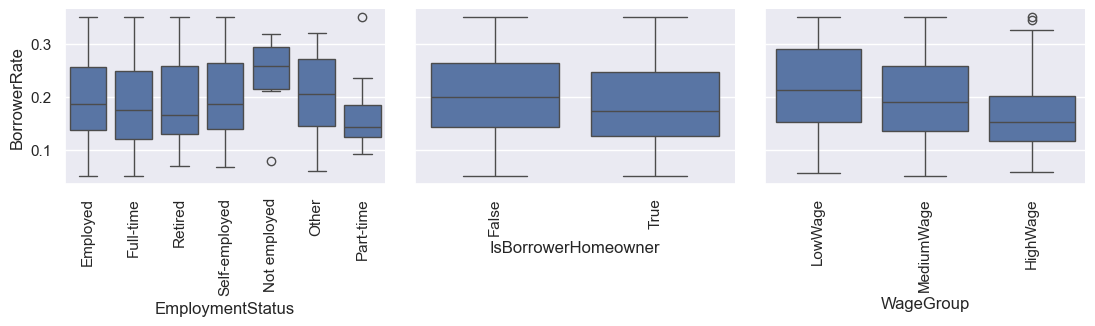

In [159]:
# plot matrix of numeric features against categorical/ordinal features.
# use a 2000 sample since there are fewer plots and they're simpler in nature.
df_samp = df.sample(2000, replace=False)

# define boxgrid function
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=90)

# create PairGrid
g = sns.PairGrid(
    data=df_samp,
    y_vars=['BorrowerRate'],
    x_vars=['EmploymentStatus', 'IsBorrowerHomeowner', 'WageGroup'],
    aspect=1.5
)
g.map(boxgrid)
plt.show()

This image displays three box plots that show the relationship between different categorical variables and the BorrowerRate.

Y-axis (on all plots): BorrowerRate (interest rate), ranging from under 0.1 (10%) to over 0.3 (30%).

Box: Represents the middle 50% of the data (the Interquartile Range or IQR).

Line inside the box: Represents the median (50th percentile) rate.

Whiskers (lines): Show the rest of the distribution, typically excluding outliers.

Circles: Represent outliers.

This image displays three box plots that show the relationship between different categorical variables and the BorrowerRate.

Y-axis (on all plots): BorrowerRate (interest rate), ranging from under 0.1 (10%) to over 0.3 (30%).

Box: Represents the middle 50% of the data (the Interquartile Range or IQR).

Line inside the box: Represents the median (50th percentile) rate.

Whiskers (lines): Show the rest of the distribution, typically excluding outliers.

Circles: Represent outliers.

Key Insights from Each Plot
EmploymentStatus (Left Plot):

This plot shows the most variation. The median rates for most groups (Employed, Full-time, Retired, Self-employed) are all clustered in a similar range.

"Not employed" has the highest median BorrowerRate.

"Part-time" has the lowest median BorrowerRate, but its box is very wide, indicating a large spread in rates for this group.

IsBorrowerHomeowner (Center Plot):

This shows a clear difference.

Homeowners (True) have a noticeably lower median BorrowerRate and a lower overall distribution compared to non-homeowners (False).

WageGroup (Right Plot):

This plot shows a strong, clear trend.

LowWage earners have the highest median interest rates.

MediumWage earners have lower rates than the low-wage group.

HighWage earners have the lowest median interest rates.

This indicates a negative correlation: as wages increase, the borrower's interest rate tends to decrease.

In [555]:
df["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled'],
      dtype=object)

In [556]:
#Remove current loans as they cannot be counted as good or bad loans
loan_data_historical= df.copy()

loan_data_historical = df[df["LoanStatus"] != "Current"]
loan_data_historical["LoanStatus"].value_counts()

LoanStatus
Completed                 33419
Chargedoff                10592
Defaulted                  3278
Past Due (1-15 days)        806
Past Due (31-60 days)       362
Past Due (61-90 days)       308
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     1
Name: count, dtype: int64

In [557]:
loan_data_historical.shape

(49554, 72)

In [558]:
loan_data_historical["LoanStatus"] = np.where(
    loan_data_historical["LoanStatus"].isin(["Completed", "Current"]),
    1,
    0
)


In [559]:
loan_data_historical["LoanStatus"] 

0         1
11        1
12        0
15        0
21        1
         ..
113927    1
113928    1
113929    1
113933    0
113935    1
Name: LoanStatus, Length: 49554, dtype: int64

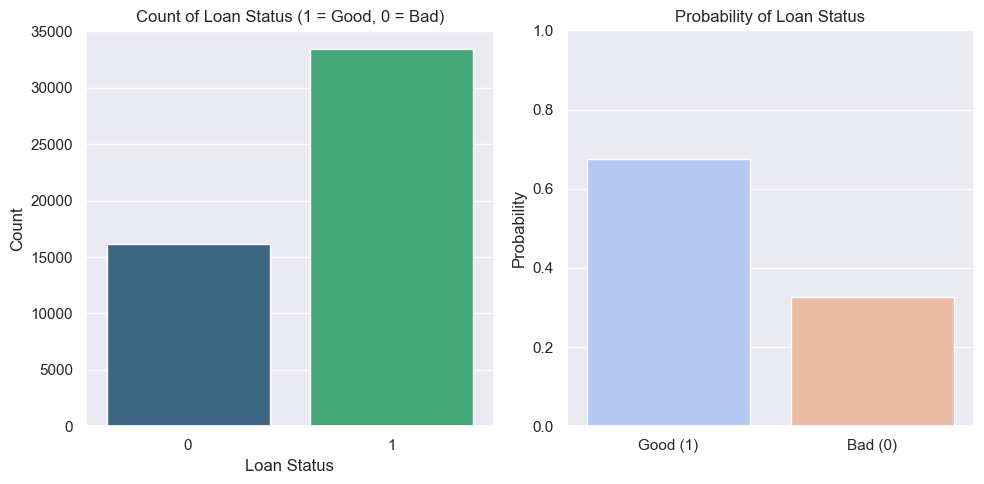

Probability of Good (1) Loan: 0.67
Probability of Bad (0) Loan: 0.33


In [560]:
# Create figure
fig = plt.figure(figsize=(10, 5))

# Count plot of Loan Status
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x="LoanStatus", data=loan_data_historical, ax=ax1, palette="viridis")
ax1.set_title("Count of Loan Status (1 = Good, 0 = Bad)")
ax1.set_xlabel("Loan Status")
ax1.set_ylabel("Count")

# Compute probabilities
good_prob = loan_data_historical["LoanStatus"].mean()
bad_prob = 1 - good_prob

# Bar plot for probabilities
ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(
    x=["Good (1)", "Bad (0)"],
    y=[good_prob, bad_prob],
    palette="coolwarm",
    ax=ax2
)
ax2.set_ylim(0, 1)
ax2.set_title("Probability of Loan Status")
ax2.set_ylabel("Probability")

plt.tight_layout()
plt.show()

# Display probabilities in console
print(f"Probability of Good (1) Loan: {good_prob:.2f}")
print(f"Probability of Bad (0) Loan: {bad_prob:.2f}")


This image displays two bar charts that summarize the final aggregated target variable, "Loan Status," after processing.

Left Chart: Count of Loan Status (1 = Good, 0 = Bad)
This chart shows the absolute number of loans in each category.

Status 0 (Bad): There are approximately 16,000 "Bad" loans.

Status 1 (Good): There are approximately 34,000 "Good" loans.

Right Chart: Probability of Loan Status
This chart normalizes the counts into probabilities.

Good (1): The probability of a loan being "Good" is approximately 0.68 (or 68%).

Bad (0): The probability of a loan being "Bad" is approximately 0.32 (or 32%).

Key Takeaway:
The dataset is imbalanced, but not severely. There are roughly twice as many "Good" loans as "Bad" loans (a ~2:1 ratio). This is an important consideration for building a predictive model, as the model might be biased towards predicting the majority class ("Good").

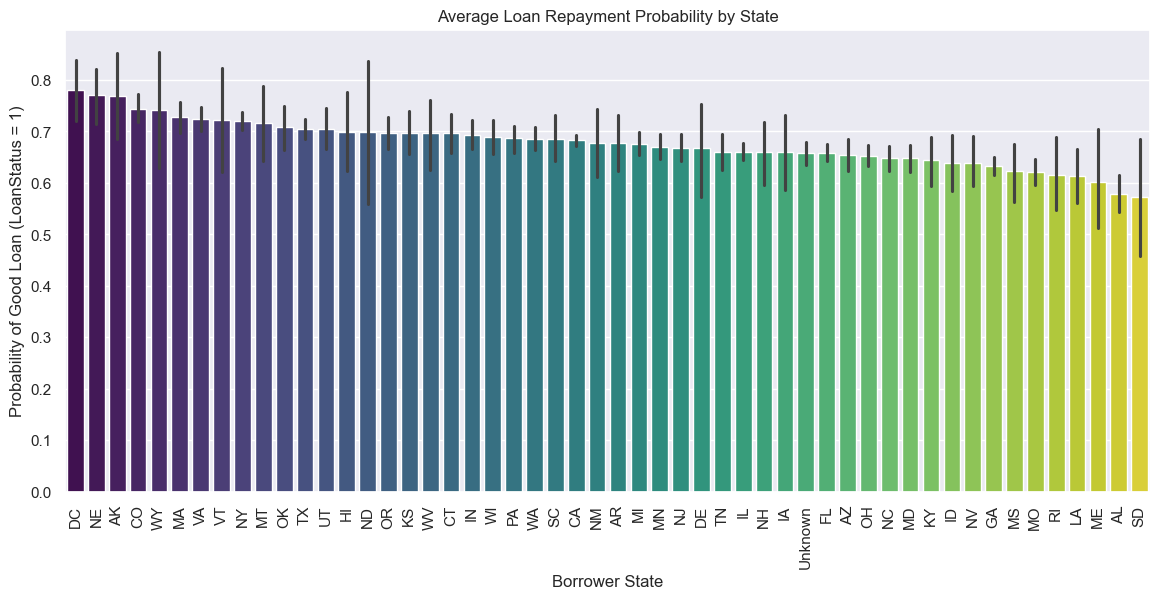

In [561]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x="BorrowerState",
    y="LoanStatus",
    data=loan_data_historical,
    estimator=np.mean,
    order=loan_data_historical.groupby("BorrowerState")["LoanStatus"].mean().sort_values(ascending=False).index,
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Average Loan Repayment Probability by State")
plt.xlabel("Borrower State")
plt.ylabel("Probability of Good Loan (LoanStatus = 1)")
plt.show()

This is a bar chart titled "Average Loan Repayment Probability by State." It shows the likelihood of a loan being "Good" (LoanStatus = 1) for each borrower's state.

Y-axis (Vertical): Represents the "Probability of Good Loan," ranging from 0.0 to over 0.8.

X-axis (Horizontal): Lists the different "Borrower States" (using two-letter abbreviations).

Sorting: The bars are sorted in descending order, from the state with the highest probability on the left to the lowest on the right.

Error Bars: The black vertical lines on each bar indicate the confidence interval or variability for that state's average.

Key Observations:

Best Performing States: DC (District of Columbia), ME (Maine), and AK (Alaska) have the highest probabilities of good loan repayment, all with averages above 0.78 (or 78%).

Worst Performing States: AL (Alabama) and SD (South Dakota) have the lowest probabilities, with averages around 0.65 (or 65%).

Variability: The length of the error bars varies. Some states (like WY, ND, KS) have very long error bars, suggesting that the average probability is less certain, possibly due to a smaller number of loans from those states. States like DC have tighter error bars, indicating more confidence in the average.

In [562]:
al = loan_data_historical[loan_data_historical["BorrowerState"] == "AL"]
dc = loan_data_historical[loan_data_historical["BorrowerState"] == "DC"]

bad_prob_al = 1 - al["LoanStatus"].mean()
bad_prob_dc = 1 - dc["LoanStatus"].mean()

print(f"Probability of Bad Loans (Default) in Alabama (AL): {bad_prob_al:.2%}")
print(f"Probability of Bad Loans (Default) in Washington DC: {bad_prob_dc:.2%}")

Probability of Bad Loans (Default) in Alabama (AL): 42.19%
Probability of Bad Loans (Default) in Washington DC: 22.04%


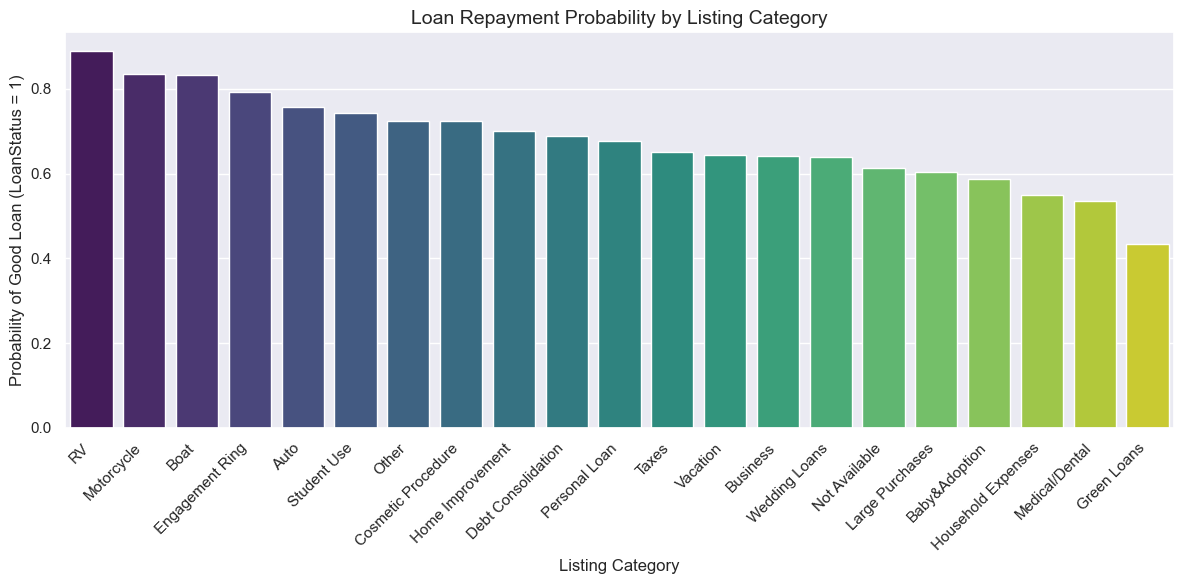

In [563]:
## Optional: map numeric categories to readable names (if needed)
## category_map = {1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal Loan", 5: "Medical", 6: "Education", 7: "Vacation"}
## loan_data_historical["ListingCategory"] = loan_data_historical["ListingCategory"].map(category_map)

plt.figure(figsize=(12, 6))

## Bar plot
sns.barplot(
    x="ListingCategory",
    y="LoanStatus",
    data=loan_data_historical,
    estimator=np.mean,                        # show probability of good loans
    ci=None,                                  # remove error bars for faster rendering
    order=loan_data_historical.groupby("ListingCategory")["LoanStatus"].mean().sort_values(ascending=False).index,
    palette="viridis"
)

## Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

### Labels and title
plt.xlabel("Listing Category", fontsize=12)
plt.ylabel("Probability of Good Loan (LoanStatus = 1)", fontsize=12)
plt.title("Loan Repayment Probability by Listing Category", fontsize=14)
plt.tight_layout()

plt.show()


This bar chart shows the "Loan Repayment Probability by Listing Category."

Y-axis (Vertical): This is the "Probability of Good Loan (LoanStatus = 1)," showing the likelihood of a loan being successfully repaid.

X-axis (Horizontal): This lists the various "Listing Categories," or the stated reasons for the loans.

Key Observations:

The chart is sorted from the highest repayment probability (left) to the lowest (right).

Best Performing Categories: Loans for specific, high-value assets like RV, Motorcycle, and Boat have the highest probability of repayment (all over 80%).

Worst Performing Categories: Medical/Dental and Green Loans have the lowest repayment probabilities, with "Green Loans" being the lowest at around 45%.

Debt Consolidation: This category, which was the most frequent in a previous chart, has a repayment probability of around 70%.

In [565]:
rv, green = loan_data_historical[loan_data_historical["ListingCategory"] == "RV"], loan_data_historical[loan_data_historical["ListingCategory"] == "Green Loans"]

bad_prob_rv = 1 - rv["LoanStatus"].mean()
bad_prob_green = 1 - green["LoanStatus"].mean()

print(f"Probability of Bad Loans in RV: {bad_prob_rv:.2%}")
print(f"Probability of Bad Loans in Green Loans: {bad_prob_green:.2%}")

Probability of Bad Loans in RV: 11.11%
Probability of Bad Loans in Green Loans: 56.52%


<Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

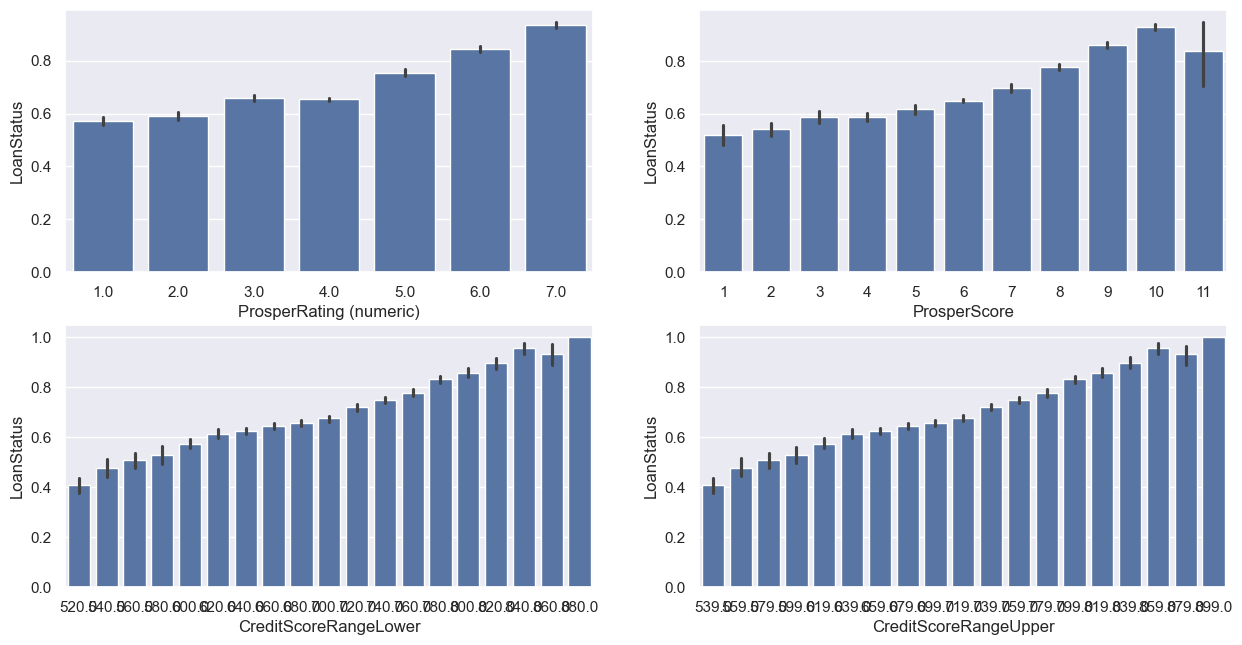

In [566]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=loan_data_historical)

ax2 = fig.add_subplot(222)
sns.barplot(x="ProsperScore", y="LoanStatus", data=loan_data_historical)

ax3 = fig.add_subplot(223)
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=loan_data_historical)

ax4 = fig.add_subplot(224)
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=loan_data_historical)

This image contains four bar charts, each illustrating the relationship between a specific credit or risk metric and the LoanStatus (which represents the probability of a good loan).

The main takeaway from all four plots is that these variables are excellent predictors of loan repayment.

Here's a breakdown of each:

Top-Left: ProsperRating (numeric) vs. LoanStatus

This shows a clear, positive relationship. As the ProsperRating increases from 1.0 to 7.0, the probability of a good loan steadily increases from about 58% to nearly 90%.

Top-Right: ProsperScore vs. LoanStatus

This shows a very similar strong, positive trend. As the ProsperScore increases from 1 to 11, the probability of a good loan rises from just over 50% to over 80%.

Bottom-Left: CreditScoreRangeLower vs. LoanStatus

This chart demonstrates a very strong, almost linear positive correlation. The higher the lower-bound of a borrower's credit score, the higher the probability they will repay the loan.

Bottom-Right: CreditScoreRangeUpper vs. LoanStatus

This plot is nearly identical to the one on its left. It confirms that as the upper-bound of a borrower's credit score increases, the probability of a good loan also increases in a very consistent and predictable way.

In [567]:
credit_score_range = loan_data_historical["CreditScoreRangeUpper"] - loan_data_historical["CreditScoreRangeLower"]

credit_score_range.value_counts()

19.0    49554
Name: count, dtype: int64

In [568]:
loan_data_historical.drop("CreditScoreRangeUpper", axis=1, inplace=True)

loan_data_historical.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace=True)

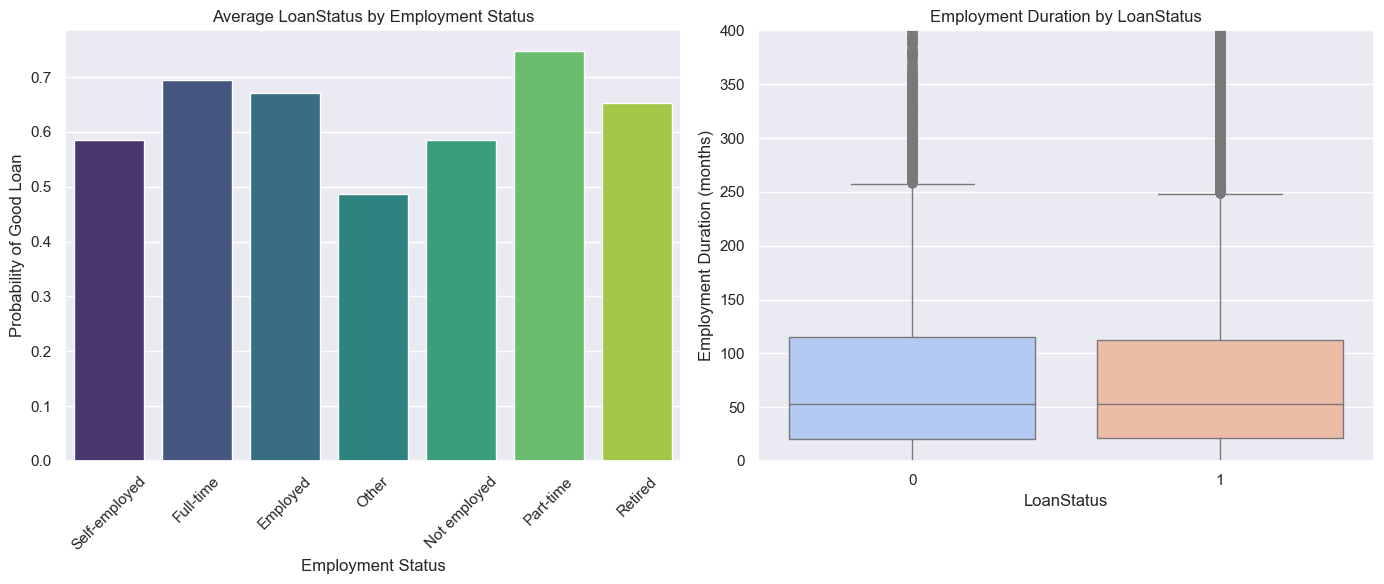

In [569]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot: average LoanStatus by EmploymentStatus
sns.barplot(
    x="EmploymentStatus",
    y="LoanStatus",
    data=loan_data_historical,
    ci=None,
    palette="viridis",
    ax=axs[0]
)
axs[0].set_title("Average LoanStatus by Employment Status")
axs[0].set_xlabel("Employment Status")
axs[0].set_ylabel("Probability of Good Loan")
axs[0].tick_params(axis='x', rotation=45)

# Box plot: EmploymentStatusDuration vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="EmploymentStatusDuration",
    data=loan_data_historical,
    ax=axs[1],
    palette="coolwarm"
)
axs[1].set_title("Employment Duration by LoanStatus")
axs[1].set_xlabel("LoanStatus")
axs[1].set_ylabel("Employment Duration (months)")
axs[1].set_ylim(0, 400)  # limit y-axis for better visualization

plt.tight_layout()
plt.show()


Left Plot: Average LoanStatus by Employment Status
This bar chart shows the average probability of a loan being "Good" (LoanStatus = 1) for each employment category.

Best Performers: Borrowers who are "Part-time" have the highest probability of repaying their loans (around 75%). "Full-time" and "Employed" also have high probabilities (around 70%).

Worst Performers: The "Other" category has the lowest probability of a good loan (just under 50%). "Not employed" and "Self-employed" also have lower probabilities (both under 60%).

Right Plot: Employment Duration by LoanStatus
This box plot compares the distribution of "Employment Duration (months)" for "Bad" loans (0) and "Good" loans (1).

Key Finding: The two boxes are nearly identical.

This indicates that there is no significant difference in the employment duration between borrowers who had "Good" loans and those who had "Bad" loans.

The median employment duration (the center line) is the same for both groups, at approximately 50 months.

This suggests that employment duration, by itself, is not a strong predictor of whether a loan will be repaid or not.

In [570]:
x = loan_data_historical["EmploymentStatusDuration"]
y = loan_data_historical["LoanStatus"]

r, p = st.pearsonr(x, y)

print("The correlation between employment status duration and loan default is {}, with a p-value of {}".format(r, p))

The correlation between employment status duration and loan default is -0.005775249625242231, with a p-value of 0.19858587920234336


In [571]:
loan_data_historical.drop("EmploymentStatusDuration", axis=1, inplace=True)

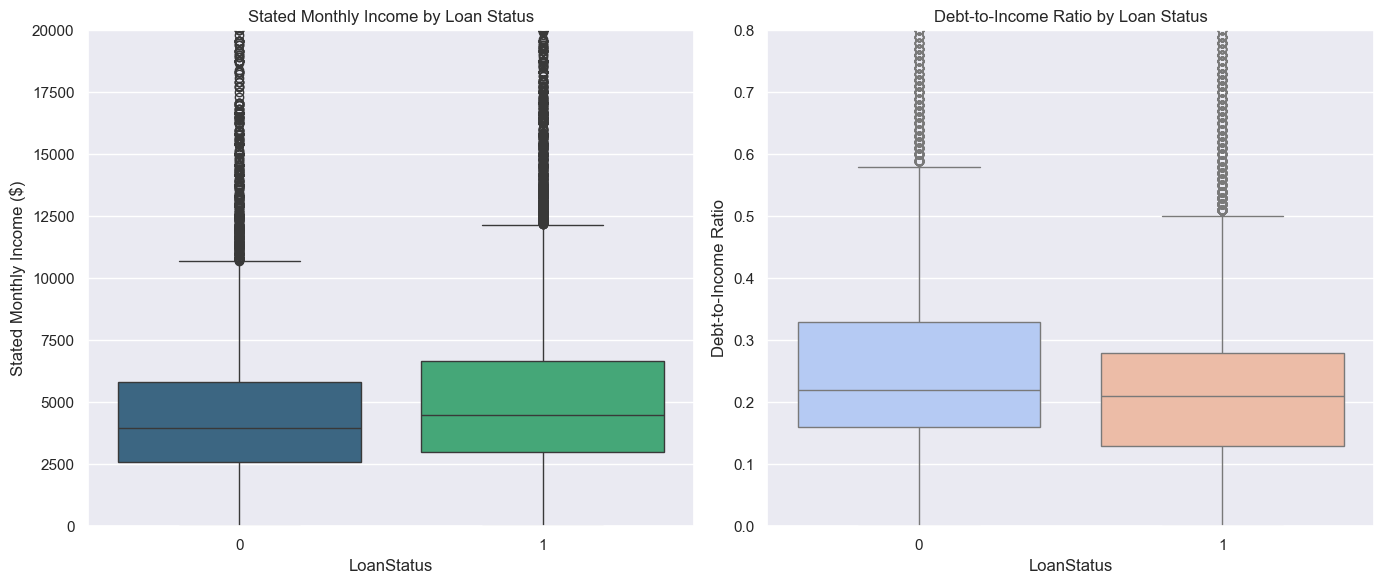

In [572]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: StatedMonthlyIncome vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="StatedMonthlyIncome",
    data=loan_data_historical,
    ax=axs[0],
    palette="viridis"
)
axs[0].set_title("Stated Monthly Income by Loan Status")
axs[0].set_xlabel("LoanStatus")
axs[0].set_ylabel("Stated Monthly Income ($)")
axs[0].set_ylim(0, 20000)  # Limit y-axis for better readability

# Boxplot 2: DebtToIncomeRatio vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="DebtToIncomeRatio",
    data=loan_data_historical,
    ax=axs[1],
    palette="coolwarm"
)
axs[1].set_title("Debt-to-Income Ratio by Loan Status")
axs[1].set_xlabel("LoanStatus")
axs[1].set_ylabel("Debt-to-Income Ratio")
axs[1].set_ylim(0, 0.8)  # Limit y-axis

plt.tight_layout()
plt.show()


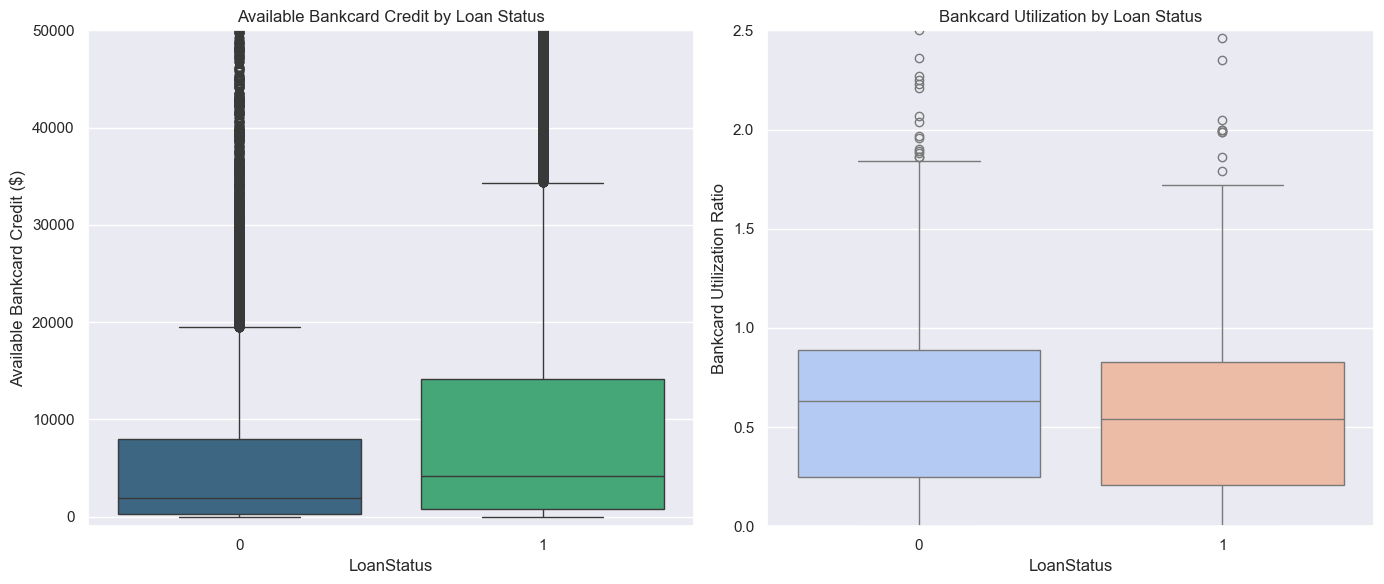

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: AvailableBankcardCredit vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="AvailableBankcardCredit",
    data=loan_data_historical,
    ax=axs[0],
    palette="viridis"
)
axs[0].set_title("Available Bankcard Credit by Loan Status")
axs[0].set_xlabel("LoanStatus")
axs[0].set_ylabel("Available Bankcard Credit ($)")
axs[0].set_ylim(-1000, 50000)  # Limit y-axis for better visualization

# Boxplot 2: BankcardUtilization vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="BankcardUtilization",
    data=loan_data_historical,
    ax=axs[1],
    palette="coolwarm"
)
axs[1].set_title("Bankcard Utilization by Loan Status")
axs[1].set_xlabel("LoanStatus")
axs[1].set_ylabel("Bankcard Utilization Ratio")
axs[1].set_ylim(0, 2.5)  # Limit y-axis

plt.tight_layout()
plt.show()


This image contains two box plots, both comparing financial metrics between "Good" loans (LoanStatus = 1) and "Bad" loans (LoanStatus = 0).

Left Plot: Available Bankcard Credit by Loan Status
Y-axis: Available Bankcard Credit ($)

Key Insight: Borrowers with "Good" loans (1) have a significantly higher median and overall distribution of available bankcard credit (median around $4,000) compared to borrowers with "Bad" loans (0) (median very low, around $1,000-$2,000).

Right Plot: Bankcard Utilization by Loan Status
Y-axis: Bankcard Utilization Ratio (the percentage of available credit being used)

Key Insight: Borrowers with "Bad" loans (0) have a higher median bankcard utilization (around 60-65%) than borrowers with "Good" loans (1) (around 50%).

Summary
This visualization reveals a clear pattern:

Good borrowers (Status 1) tend to have more available credit and use a smaller percentage of it.

Bad borrowers (Status 0) tend to have less available credit and use a larger percentage of what they have.

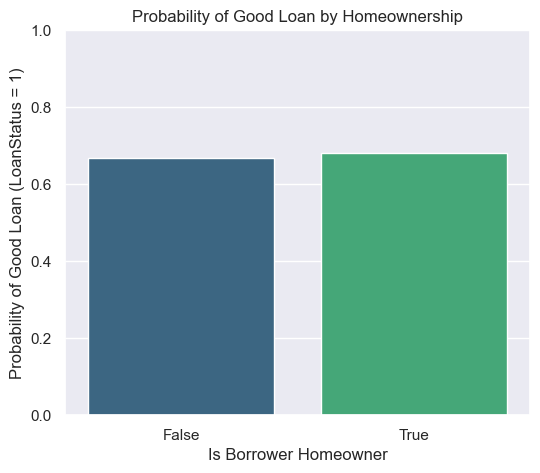

In [573]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(
    x="IsBorrowerHomeowner",
    y="LoanStatus",
    data=loan_data_historical,
    ci=None,  # disables confidence intervals for faster plotting
    palette="viridis"
)

ax.set_ylim(0, 1)
ax.set_title("Probability of Good Loan by Homeownership")
ax.set_xlabel("Is Borrower Homeowner")
ax.set_ylabel("Probability of Good Loan (LoanStatus = 1)")

plt.show()

This bar chart shows the "Probability of Good Loan by Homeownership."

X-axis: "Is Borrower Homeowner," showing two categories: "False" (non-homeowners) and "True" (homeowners).

Y-axis: "Probability of Good Loan (LoanStatus = 1)," ranging from 0.0 to 1.0.

Key Observation:

The probability of having a "Good Loan" is very similar for both groups.

Non-homeowners ("False"): Have a good loan probability of approximately 0.67 (67%).

Homeowners ("True"): Have a good loan probability of approximately 0.68 (68%).

This suggests that homeownership has only a very slight positive impact on the likelihood of a loan being repaid in this dataset.

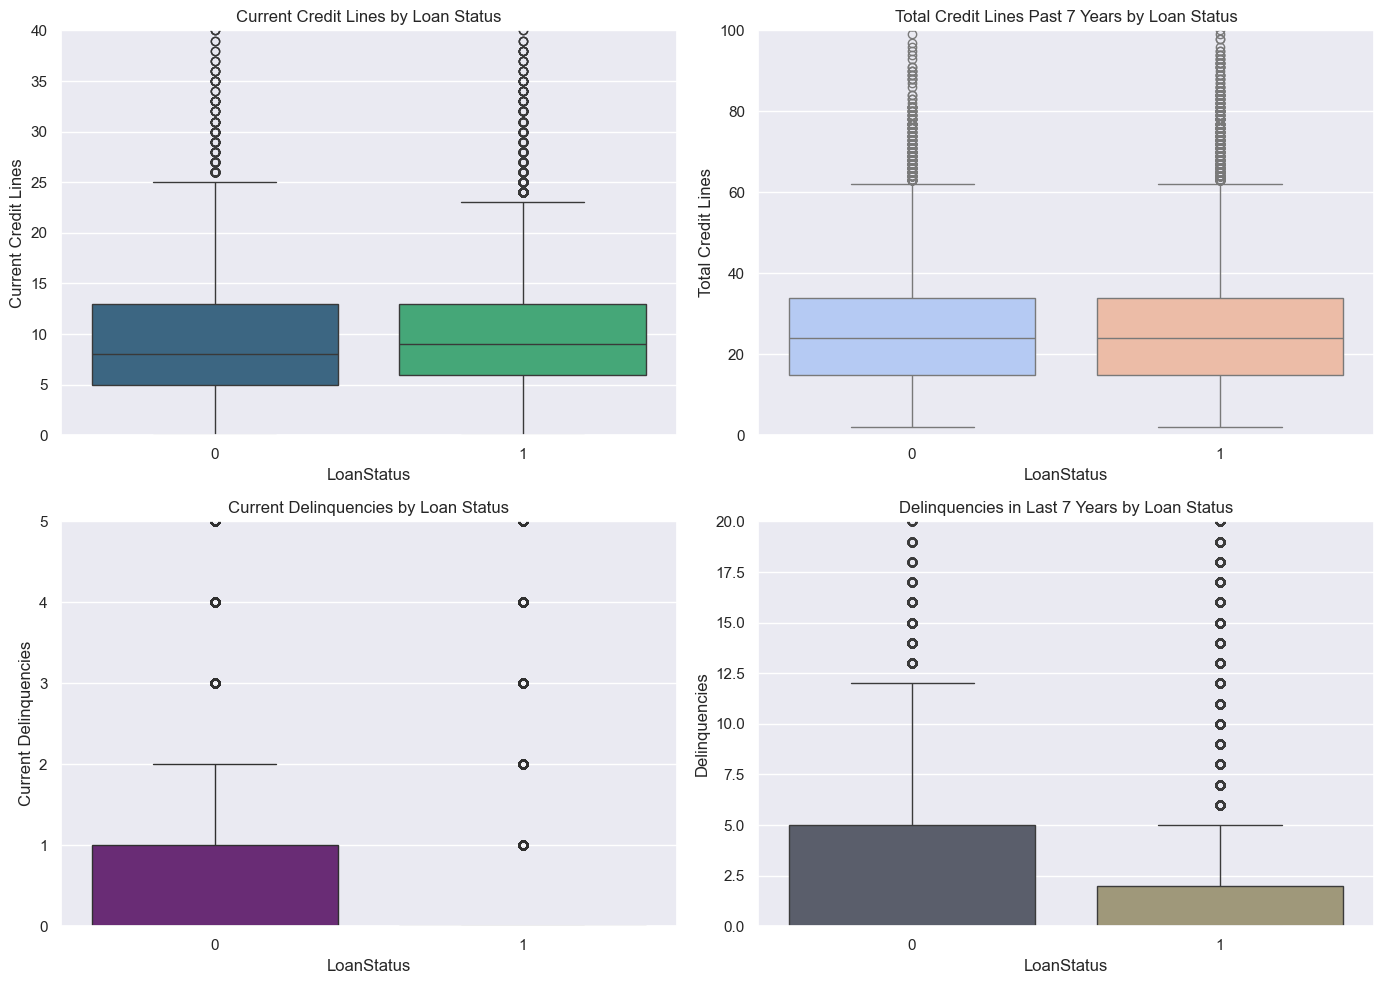

In [574]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1️⃣ CurrentCreditLines vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="CurrentCreditLines",
    data=loan_data_historical,
    ax=axs[0, 0],
    palette="viridis"
)
axs[0, 0].set_title("Current Credit Lines by Loan Status")
axs[0, 0].set_ylabel("Current Credit Lines")
axs[0, 0].set_ylim(0, 40)

# 2️⃣ TotalCreditLinespast7years vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="TotalCreditLinespast7years",
    data=loan_data_historical,
    ax=axs[0, 1],
    palette="coolwarm"
)
axs[0, 1].set_title("Total Credit Lines Past 7 Years by Loan Status")
axs[0, 1].set_ylabel("Total Credit Lines")
axs[0, 1].set_ylim(0, 100)

# 3️⃣ CurrentDelinquencies vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="CurrentDelinquencies",
    data=loan_data_historical,
    ax=axs[1, 0],
    palette="magma"
)
axs[1, 0].set_title("Current Delinquencies by Loan Status")
axs[1, 0].set_ylabel("Current Delinquencies")
axs[1, 0].set_ylim(0, 5)

# 4️⃣ DelinquenciesLast7Years vs LoanStatus
sns.boxplot(
    x="LoanStatus",
    y="DelinquenciesLast7Years",
    data=loan_data_historical,
    ax=axs[1, 1],
    palette="cividis"
)
axs[1, 1].set_title("Delinquencies in Last 7 Years by Loan Status")
axs[1, 1].set_ylabel("Delinquencies")
axs[1, 1].set_ylim(0, 20)

plt.tight_layout()
plt.show()


This image displays a 2x2 grid of four box plots. Each plot compares a specific credit history metric between "Bad" loans (LoanStatus = 0) and "Good" loans (LoanStatus = 1).

Top-Left: Current Credit Lines by Loan Status
Observation: The boxes for "Bad" loans (0) and "Good" loans (1) are almost identical. Both show a median of around 10 credit lines and a similar spread (interquartile range).

Insight: This suggests that the number of Current Credit Lines is not a strong predictor of loan status.

Top-Right: Total Credit Lines Past 7 Years by Loan Status
Observation: Like the plot to its left, the distributions for "Bad" and "Good" loans are nearly identical. Both have a median of around 25 total credit lines.

Insight: The Total Credit Lines Past 7 Years also appears to be a weak predictor of the loan outcome.

Bottom-Left: Current Delinquencies by Loan Status
Observation: For both "Good" and "Bad" loans, the vast majority of borrowers have 0 Current Delinquencies. The median is 0 and the 75th percentile (top of the box) is 1 for both.

Insight: This metric does not differentiate between the two groups.

Bottom-Right: Delinquencies in Last 7 Years by Loan Status
Observation: This plot shows a clear and significant difference.

"Bad" loans (0): Have a higher median (around 1 delinquency) and a much wider spread. The middle 50% of "Bad" borrowers have between 0 and 5 delinquencies.

"Good" loans (1): Have a median of 0, and the middle 50% have only between 0 and 2 delinquencies.

Insight: The number of past delinquencies is a strong predictor. Borrowers who end up with "Bad" loans are significantly more likely to have a higher number of delinquencies in their 7-year history.

In [575]:
delinquency = ["CurrentDelinquencies", "DelinquenciesLast7Years"]
y = loan_data_historical["LoanStatus"]

for var in delinquency:
    x = loan_data_historical[var]
    r, p = st.pearsonr(x, y)
    print("The correlation between {} and loan default is {}, with a p-value of {}".format(var, r, p))


The correlation between CurrentDelinquencies and loan default is -0.12108967255842429, with a p-value of 3.3937345003137065e-161
The correlation between DelinquenciesLast7Years and loan default is -0.07037696761144899, with a p-value of 1.9011943758063674e-55


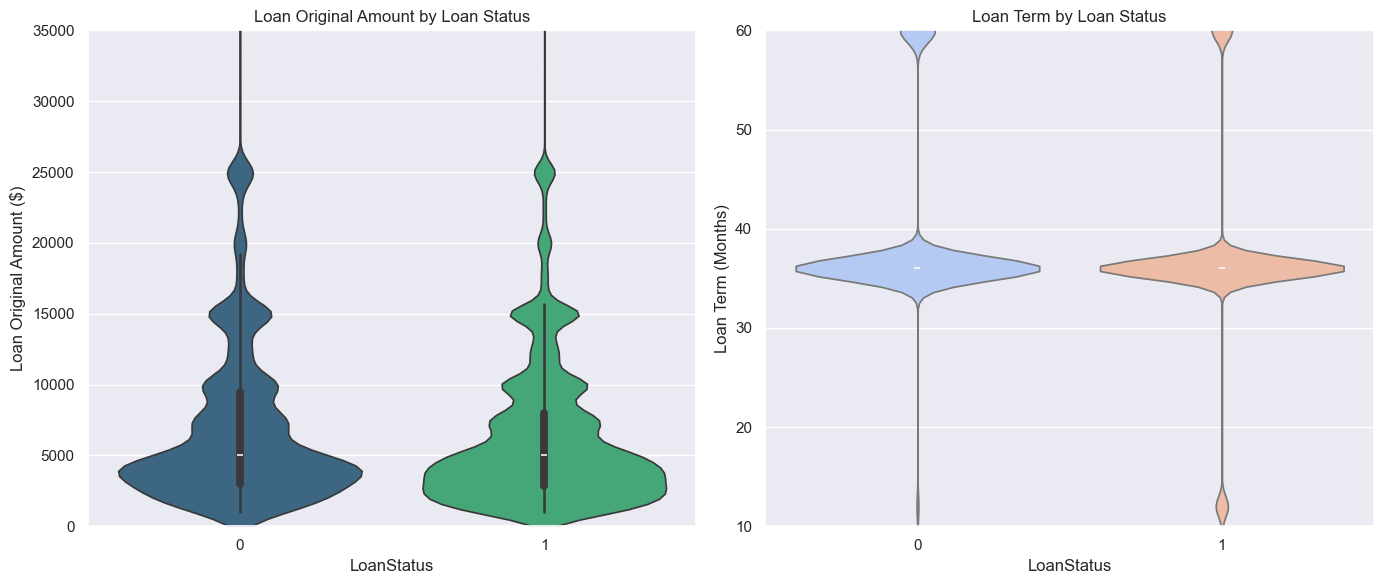

In [576]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot 1: LoanOriginalAmount vs LoanStatus
sns.violinplot(
    x="LoanStatus",
    y="LoanOriginalAmount",
    data=loan_data_historical,
    palette="viridis",
    ax=axs[0]
)
axs[0].set_title("Loan Original Amount by Loan Status")
axs[0].set_xlabel("LoanStatus")
axs[0].set_ylabel("Loan Original Amount ($)")
axs[0].set_ylim(0, 35000)  # limit y-axis

# Violin plot 2: Term vs LoanStatus
sns.violinplot(
    x="LoanStatus",
    y="Term",
    data=loan_data_historical,
    palette="coolwarm",
    ax=axs[1]
)
axs[1].set_title("Loan Term by Loan Status")
axs[1].set_xlabel("LoanStatus")
axs[1].set_ylabel("Loan Term (Months)")
axs[1].set_ylim(10, 60)  # limit y-axis

plt.tight_layout()
plt.show()

This image contains two violin plots, which are like box plots that also show the data's density and distribution.

Left Plot: Loan Original Amount by Loan Status
Y-axis: Loan Original Amount ($)

X-axis: LoanStatus (0 = Bad, 1 = Good)

Key Observations:

This plot confirms the "clumping" seen in an earlier histogram. The bulges in the violins show that loan amounts are concentrated around popular figures (like $4,000, $10,000, $15,000, etc.) rather than being smoothly distributed.

The shapes of the violins for "Bad" loans (0) and "Good" loans (1) are very similar. This indicates that the original loan amount, by itself, is not a strong differentiator between a loan that will be repaid and one that will default.

Right Plot: Loan Term by Loan Status
Y-axis: Loan Term (Months)

X-axis: LoanStatus (0 = Bad, 1 = Good)

Key Observations:

The data is clearly concentrated at three specific terms: 12, 36, and 60 months (1, 3, and 5 years).

There is a clear difference between the two groups:

"Good" loans (1) are overwhelmingly concentrated at 36 months (3 years).

"Bad" loans (0) are more spread out, with a large concentration at 36 months but also a significantly larger proportion at 60 months (5 years).

Key Insight: This suggests that longer loan terms (especially 60 months) are associated with a higher probability of the loan becoming "Bad."

<Axes: xlabel='BorrowerRate', ylabel='Density'>

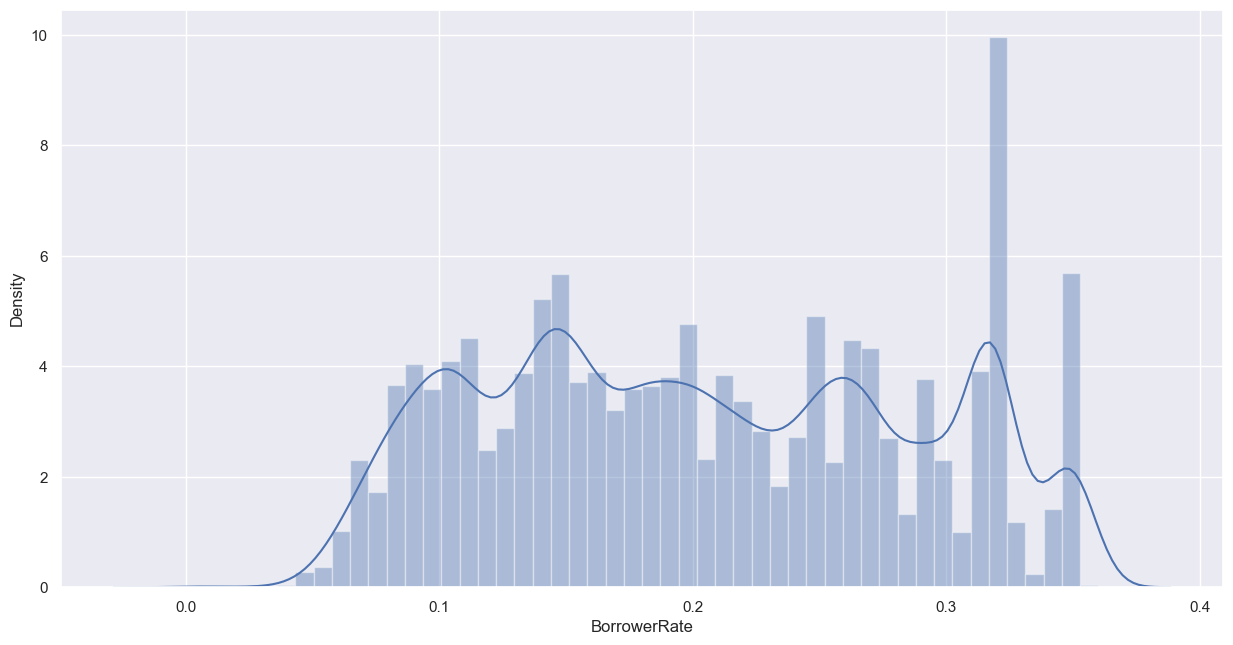

In [577]:
sns.distplot(loan_data_historical["BorrowerRate"])

This is a distribution plot (a histogram combined with a density curve) for the BorrowerRate.

X-axis: BorrowerRate (the interest rate), ranging from 0.0 to 0.4 (or 0% to 40%).

Y-axis: Density (showing the concentration of data at each rate).

Key Observations:

Multi-modal Distribution: This is the most important feature. The distribution doesn't have a single "bell curve" shape; it has multiple distinct peaks. This suggests that interest rates aren't random but are clustered around specific, common values.

Major Peak: There is a very large and sharp peak around a BorrowerRate of 0.31-0.32 (31-32%). A significant portion of the loans in this dataset have this high interest rate.

Other Peaks: You can also see smaller clusters (peaks) in the data, particularly around 0.10 (10%), 0.15 (15%), and 0.20 (20%).

In [578]:
loan_data_historical["BorrowerRate"].describe()

count    49554.000000
mean         0.203513
std          0.082464
min          0.000000
25%          0.136400
50%          0.199000
75%          0.270000
max          0.360000
Name: BorrowerRate, dtype: float64

# **Multivariate analysis**

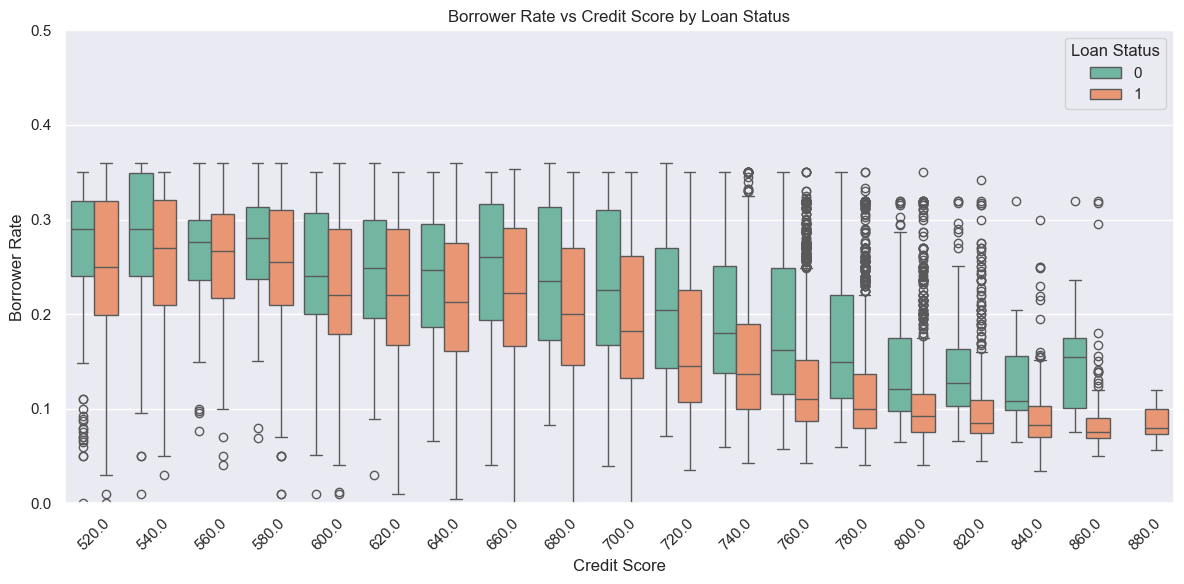

In [579]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="CreditScore",
    y="BorrowerRate",
    hue="LoanStatus",
    data=loan_data_historical,
    palette="Set2"
)

plt.title("Borrower Rate vs Credit Score by Loan Status")
plt.xlabel("Credit Score")
plt.ylabel("Borrower Rate")
plt.legend(title="Loan Status", loc="upper right")
plt.xticks(rotation=45)
plt.ylim(0, 0.5)  # optional: limit y-axis to remove extreme outliers

plt.tight_layout()
plt.show()

This is a grouped box plot that visualizes the relationship between Credit Score, Borrower Rate, and Loan Status all in one chart.

X-axis: Credit Score (in binned ranges).

Y-axis: Borrower Rate (the interest rate).

Legend: The boxes are grouped by Loan Status:

Orange (0): "Bad" loans (defaulted).

Green (1): "Good" loans (repaid).

Key Observations
Credit Score vs. Rate: There is a very strong negative correlation between Credit Score and Borrower Rate. As the credit score increases (moving left to right), the median interest rate (the line in the box) and the entire rate distribution (the box itself) consistently move lower. This is true for both good and bad loans.

Loan Status vs. Rate: This is the most important insight. Within almost every single credit score bin, the box for "Bad" loans (0, orange) is slightly higher than the box for "Good" loans (1, green).

Summary
This chart shows two things:

As expected, borrowers with higher credit scores get lower interest rates.

Even when comparing two people with the same credit score, the person who ended up defaulting (LoanStatus = 0) was, on average, given a slightly higher interest rate to begin with. This suggests the lending model correctly identified them as being a higher risk within their credit score bracket.

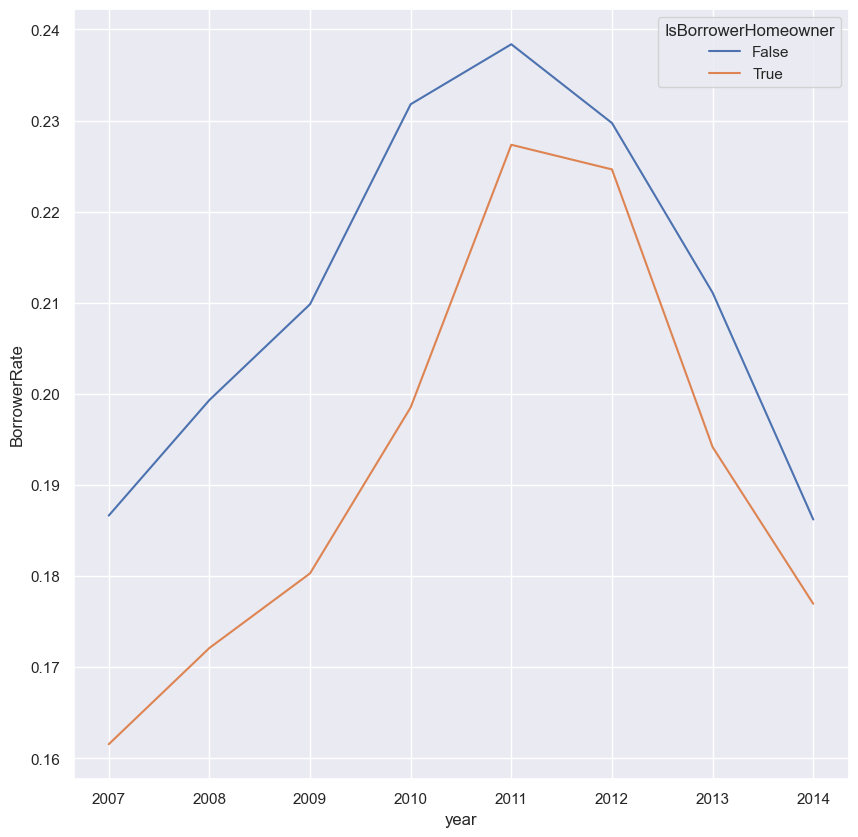

In [580]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,10))
g=sns.lineplot(data=loan_data_historical, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner',ci=None);

This is a line chart that tracks the average BorrowerRate (interest rate) over time, from 2007 to 2014, and splits the data by homeownership status.

X-axis: year

Y-axis: BorrowerRate

Blue Line: IsBorrowerHomeowner = False (Non-homeowners)

Orange Line: IsBorrowerHomeowner = True (Homeowners)

Key Observations:

Consistent Difference: At every point in time, the blue line ("False") is above the orange line ("True"). This means non-homeowners consistently received higher interest rates than homeowners.

Overall Market Trend: Both groups follow the same general trend. Interest rates started lower in 2007, rose significantly to a peak in 2011, and then steadily decreased through 2014.

Peak Rates: In 2011, the average rate for non-homeowners peaked at nearly 24% (0.24), while for homeowners, it peaked slightly lower at about 22.8% (0.228).

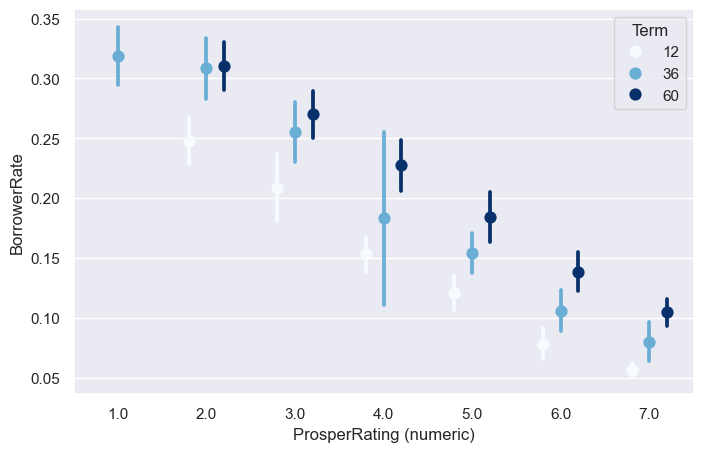

In [581]:
#plot pointplot 
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = loan_data_historical, x = 'ProsperRating (numeric)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')

This is a point plot that shows the relationship between ProsperRating, Loan Term, and BorrowerRate.

X-axis: ProsperRating (numeric) from 1.0 to 7.0.

Y-axis: BorrowerRate (the interest rate).

Legend (Term): The data is split into three loan terms: 12, 36, and 60 months.

Key Observations:

ProsperRating (Risk): There is a strong negative relationship between ProsperRating and BorrowerRate. As the rating increases (indicating lower risk), the interest rate consistently decreases.

Loan Term (Time): Within any single ProsperRating group, the interest rate is ordered by the loan term.

12-month terms (light blue) have the lowest rates.

36-month terms (medium blue) have middle rates.

60-month terms (dark blue) have the highest rates.

Summary: This chart clearly shows that both risk and time affect the interest rate. The lowest rates are given to the least risky borrowers (rating 7.0) on the shortest terms (12 months), while the highest rates go to the riskiest borrowers (rating 1.0) on the longest terms (60 months).

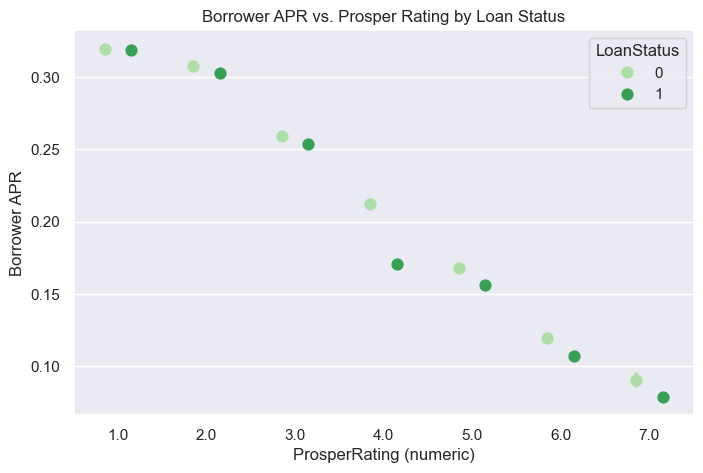

In [582]:
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = loan_data_historical, x = 'ProsperRating (numeric)', y = 'BorrowerRate', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')
plt.show();

This is a scatter plot (or point plot) titled "Borrower APR vs. Prosper Rating by Loan Status."

X-axis: ProsperRating (numeric) from 1.0 to 7.0.

Y-axis: Borrower APR (Annual Percentage Rate).

Legend: The color shows the LoanStatus:

Light Green (0): "Bad" loans (defaulted).

Dark Green (1): "Good" loans (repaid).

Key Observations
ProsperRating vs. APR: There is a very strong negative relationship between the ProsperRating and the Borrower APR. As the rating increases (indicating lower risk), the APR consistently drops.

Loan Status: At every single ProsperRating level, the light green dot (Bad Loan) is slightly higher than the dark green dot (Good Loan). This indicates that even within the same risk rating, borrowers who eventually defaulted were, on average, given a slightly higher APR from the start.

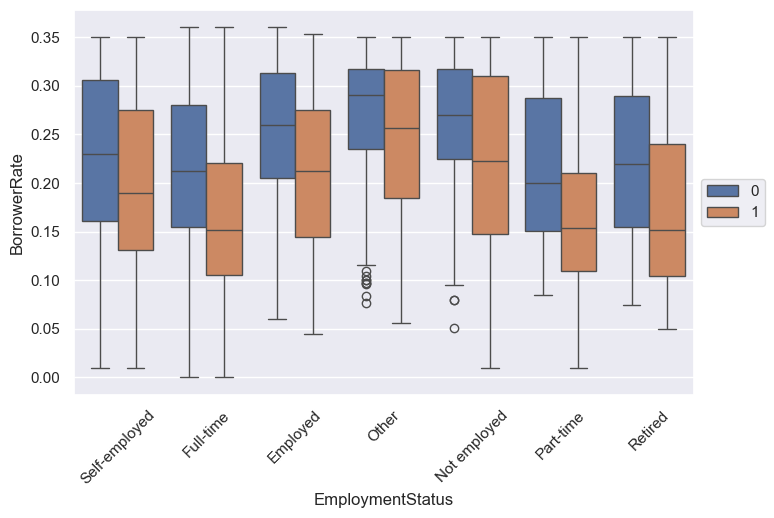

In [583]:
plt.figure(figsize=[8, 5])
sns.boxplot(data=loan_data_historical,x='EmploymentStatus',y='BorrowerRate',hue='LoanStatus',dodge=0.3);
plt.xticks(rotation=45);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) ;

This is a grouped box plot that shows the relationship between EmploymentStatus, BorrowerRate, and LoanStatus.

X-axis: EmploymentStatus (e.g., Self-employed, Full-time, etc.).

Y-axis: BorrowerRate (the interest rate).

Legend: The boxes are grouped by LoanStatus:

Blue (0): "Bad" loans (defaulted).

Orange (1): "Good" loans (repaid).

Key Observation:

The most important insight is that within every single employment category, the median BorrowerRate (the line in the box) for "Bad" loans (blue) is higher than the median rate for "Good" loans (orange).

This indicates that, on average, borrowers who eventually defaulted were given slightly higher interest rates from the beginning, regardless of their employment status.

In [585]:
loan_data_historical.columns

Index(['ListingKey', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'CreditScore',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiabl

In [586]:
# Define bins for income
bins = [0, 3000, 6000, 9000, 12000, 15000, df['StatedMonthlyIncome'].max()]
labels = ['0-3k','3k-6k','6k-9k','9k-12k','12k-15k','15k+']

# Create WageGroup
df['WageGroup'] = pd.cut(df['StatedMonthlyIncome'], bins=bins, labels=labels)

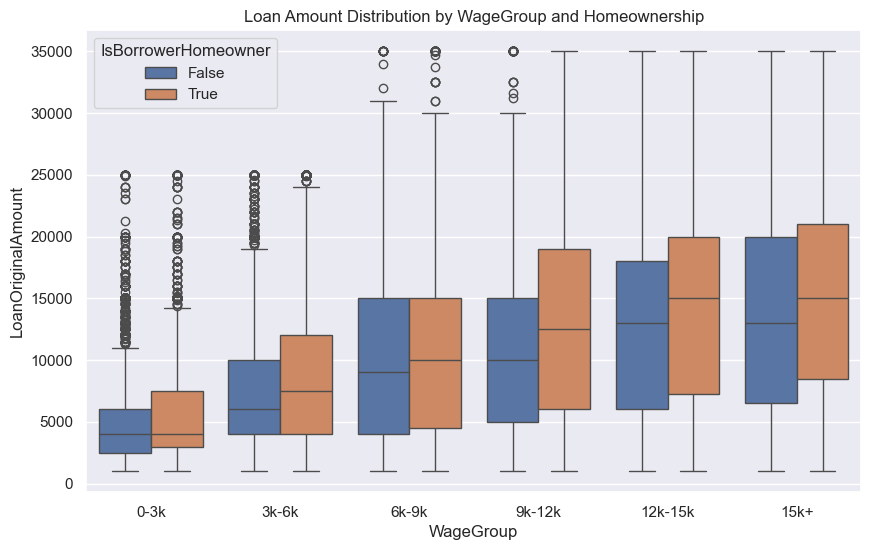

In [587]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,6])
sns.boxplot(data=df, x='WageGroup', y='LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.title("Loan Amount Distribution by WageGroup and Homeownership")
plt.show()

This is a grouped box plot that shows the distribution of the LoanOriginalAmount based on both the WageGroup and Homeownership status.

X-axis: WageGroup, categorized into income brackets (e.g., 0-3k, 3k-6k, etc.).

Y-axis: LoanOriginalAmount (the loan size).

Legend: The boxes are grouped by IsBorrowerHomeowner:

Blue (False): Non-homeowners.

Orange (True): Homeowners.

Key Observations:

Wage and Loan Amount: There is a strong, positive relationship between the WageGroup and the LoanOriginalAmount. As the wage group increases (moving from left to right), the median loan amount (the line in the box) and the entire distribution consistently shift upwards. This means people who earn more tend to take out larger loans.

Homeownership and Loan Amount: Within every single wage group, the orange box (True - Homeowners) is higher than the blue box (False - Non-homeowners). This indicates that homeowners consistently borrow larger amounts of money than non-homeowners, even when they are in the same income bracket.

In [588]:
loan_data_historical["EmploymentStatus"] = ((loan_data_historical["EmploymentStatus"] == "Employed") | (loan_data_historical["EmploymentStatus"] =="Full-time") |( loan_data_historical["EmploymentStatus"] =="Part-time") | (loan_data_historical["EmploymentStatus"] =="Self-employed")).astype(int)

loan_data_historical["EmploymentStatus"][:10]

0     1
11    1
12    1
15    0
21    1
23    1
26    1
27    1
30    1
33    1
Name: EmploymentStatus, dtype: int64

In [589]:
print(loan_data_historical.columns.tolist())

['ListingKey', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'CreditScore', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', '

# **Feature Engineering**

In [590]:
columns_to_drop = [
    "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn",
    "Occupation", "CurrentlyInGroup", "GroupKey", "PercentFunded", "ProsperRating (numeric)",
    "Recommendations", "InvestmentFromFriendsCount", "InvestmentFromFriendsAmount",
    "date", "TotalProsperLoans", "TotalProsperPaymentsBilled", "OnTimeProsperPayments",
    "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed",
    "ProsperPrincipalOutstanding", "ListingKey", "ListingCategory",
    'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years'
]

loan_data_historical.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')
loan_data_historical.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49554 entries, 0 to 113935
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49554 non-null  object 
 1   Term                                49554 non-null  int64  
 2   LoanStatus                          49554 non-null  int64  
 3   BorrowerAPR                         49554 non-null  float64
 4   BorrowerRate                        49554 non-null  float64
 5   LenderYield                         49554 non-null  float64
 6   ProsperRating (Alpha)               49554 non-null  object 
 7   ProsperScore                        49554 non-null  int64  
 8   ListingCategory (numeric)           49554 non-null  int64  
 9   BorrowerState                       49554 non-null  object 
 10  EmploymentStatus                    49554 non-null  int64  
 11  IsBorrowerHomeowner                 49554 non

In [591]:
loan_data_historical.drop(["TradesOpenedLast6Months","PublicRecordsLast10Years","PublicRecordsLast12Months",], axis=1,
                inplace=True)

loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49554 entries, 0 to 113935
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49554 non-null  object 
 1   Term                                49554 non-null  int64  
 2   LoanStatus                          49554 non-null  int64  
 3   BorrowerAPR                         49554 non-null  float64
 4   BorrowerRate                        49554 non-null  float64
 5   LenderYield                         49554 non-null  float64
 6   ProsperRating (Alpha)               49554 non-null  object 
 7   ProsperScore                        49554 non-null  int64  
 8   ListingCategory (numeric)           49554 non-null  int64  
 9   BorrowerState                       49554 non-null  object 
 10  EmploymentStatus                    49554 non-null  int64  
 11  IsBorrowerHomeowner                 49554 non

In [592]:
#adjusting the data types
loan_data_historical["IsBorrowerHomeowner"] = loan_data_historical["IsBorrowerHomeowner"].astype(int)


loan_data_historical["IsBorrowerHomeowner"][:10]

0     1
11    0
12    0
15    1
21    0
23    0
26    0
27    1
30    0
33    0
Name: IsBorrowerHomeowner, dtype: int64

In [593]:
first_credit_year = loan_data_historical["FirstRecordedCreditLine"].str[:4]

loan_data_historical["YearsWithCredit"] = 2014 - pd.to_numeric(first_credit_year)

loan_data_historical.drop("FirstRecordedCreditLine", axis=1, inplace=True)

loan_data_historical["YearsWithCredit"][:10]

0     13
11    14
12    18
15    15
21    11
23    16
26    39
27    14
30    26
33    11
Name: YearsWithCredit, dtype: int64

In [594]:
loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49554 entries, 0 to 113935
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49554 non-null  object 
 1   Term                                49554 non-null  int64  
 2   LoanStatus                          49554 non-null  int64  
 3   BorrowerAPR                         49554 non-null  float64
 4   BorrowerRate                        49554 non-null  float64
 5   LenderYield                         49554 non-null  float64
 6   ProsperRating (Alpha)               49554 non-null  object 
 7   ProsperScore                        49554 non-null  int64  
 8   ListingCategory (numeric)           49554 non-null  int64  
 9   BorrowerState                       49554 non-null  object 
 10  EmploymentStatus                    49554 non-null  int64  
 11  IsBorrowerHomeowner                 49554 non

In [595]:
# Step 1: Calculate default rate by state
#state_defaults = loan_data_historical.groupby("BorrowerState")["LoanStatus"].mean()

# Step 2: Define risk thresholds based on sorted default rates
#vlow_risk = sorted_defaults[51]
#low_risk = sorted_defaults[40]
#mid_risk = sorted_defaults[29]
#high_risk = sorted_defaults[19]
#vhigh_risk = sorted_defaults[9]

# Step 3: Map each state to a numeric risk value
#new_geography = {}
#for state in state_defaults.index:
    #if state_defaults[state] < vhigh_risk:
        #v = 1  # Very high risk
    #elif state_defaults[state] < high_risk:
        #v = 2  # High risk
    #elif state_defaults[state] < mid_risk:
        #v = 3  # Medium risk
    #elif state_defaults[state] < low_risk:
        #v = 4  # Low risk
    #else:
        #v = 5  # Very low risk
    #new_geography[state] = v

# Step 4: Replace states with numeric risk values
#loan_data_historical.replace(to_replace={"BorrowerState": new_geography}, inplace=True)

# Step 5: Check the first 10 rows
#print(loan_data_historical["BorrowerState"][:10])

# Optional: Drop BorrowerState if you decide not to use it
loan_data_historical.drop(["BorrowerState"], inplace=True, axis=1)


In [597]:
# Step 0: Create WageGroup
bins = [0, 3000, 6000, 9000, 12000, 15000, loan_data_historical['StatedMonthlyIncome'].max()]
labels = ['0-3k','3k-6k','6k-9k','9k-12k','12k-15k','15k+']

loan_data_historical['WageGroup'] = pd.cut(
    loan_data_historical['StatedMonthlyIncome'], 
    bins=bins, 
    labels=labels
)

# Step 1: Create dummy variables
wage_dummies = pd.get_dummies(
    loan_data_historical["WageGroup"], 
    prefix="WageGroup", 
    dummy_na=True
)

# Step 2: Concatenate the dummy columns
loan_data_historical = pd.concat([loan_data_historical, wage_dummies], axis=1)

# Step 3: Drop the original WageGroup column
loan_data_historical.drop("WageGroup", axis=1, inplace=True)

# Step 4: Verify
loan_data_historical.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49554 entries, 0 to 113935
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49554 non-null  object 
 1   Term                                49554 non-null  int64  
 2   LoanStatus                          49554 non-null  int64  
 3   BorrowerAPR                         49554 non-null  float64
 4   BorrowerRate                        49554 non-null  float64
 5   LenderYield                         49554 non-null  float64
 6   ProsperRating (Alpha)               49554 non-null  object 
 7   ProsperScore                        49554 non-null  int64  
 8   ListingCategory (numeric)           49554 non-null  int64  
 9   EmploymentStatus                    49554 non-null  int64  
 10  IsBorrowerHomeowner                 49554 non-null  int64  
 11  CreditScore                         49554 non

In [598]:
loan_data_historical.reset_index(drop=True, inplace=True)
loan_data_historical[loan_data_historical.select_dtypes(include='uint8').columns] = loan_data_historical[loan_data_historical.select_dtypes(include='uint8').columns].astype('int64')

In [599]:
loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49554 entries, 0 to 49553
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49554 non-null  object 
 1   Term                                49554 non-null  int64  
 2   LoanStatus                          49554 non-null  int64  
 3   BorrowerAPR                         49554 non-null  float64
 4   BorrowerRate                        49554 non-null  float64
 5   LenderYield                         49554 non-null  float64
 6   ProsperRating (Alpha)               49554 non-null  object 
 7   ProsperScore                        49554 non-null  int64  
 8   ListingCategory (numeric)           49554 non-null  int64  
 9   EmploymentStatus                    49554 non-null  int64  
 10  IsBorrowerHomeowner                 49554 non-null  int64  
 11  CreditScore                         49554

In [600]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
loan_data_historical['CreditGrade']= label_encoder.fit_transform(loan_data_historical['CreditGrade'])

In [604]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)

Index(['ProsperRating (Alpha)'], dtype='object')


In [605]:
rating_map = {
    'AA': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7, 'HR': 8
}

# Map the column
X['ProsperRating (Alpha)'] = X['ProsperRating (Alpha)'].map(rating_map)


In [606]:
X['ProsperRating (Alpha)'] = X['ProsperRating (Alpha)'].fillna(X['ProsperRating (Alpha)'].median())

In [607]:
print(X['ProsperRating (Alpha)'].dtype)

float64


In [608]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

baseline = RandomForestClassifier(random_state=0)
baseline_score = cross_val_score(baseline, X, y, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
baseline_score = 100 * baseline_score.mean()
print(f"Accuracy Baseline Score: {baseline_score:.2f}%")



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Accuracy Baseline Score: 99.41%


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.6s finished


In [609]:
y.value_counts(normalize=True)

LoanStatus
1    0.674396
0    0.325604
Name: proportion, dtype: float64

✅ Insights

Classes are moderately imbalanced, but not extreme.

Accuracy alone may overestimate model performance.

Metrics like precision, recall, F1-score, or ROC-AUC are more informative, especially for the minority class.

Next steps for robust evaluation:

Use StratifiedKFold to maintain class proportions in cross-validation.

Calculate classification report: precision, recall, F1-score.

Optionally, use class weights in RandomForest to penalize misclassification of the minority class:

In [610]:
# getting all discrete and continuous features to get MI for both seperatly
X = loan_data_historical.copy()
y = X.pop("LoanStatus")

discrete_features = X.dtypes == int
discrete_features


CreditGrade                            True
Term                                   True
BorrowerAPR                           False
BorrowerRate                          False
LenderYield                           False
ProsperRating (Alpha)                 False
ProsperScore                           True
ListingCategory (numeric)              True
EmploymentStatus                       True
IsBorrowerHomeowner                    True
CreditScore                           False
CurrentCreditLines                    False
OpenCreditLines                       False
TotalCreditLinespast7years            False
OpenRevolvingAccounts                  True
OpenRevolvingMonthlyPayment           False
InquiriesLast6Months                  False
TotalInquiries                        False
RevolvingCreditBalance                False
BankcardUtilization                   False
AvailableBankcardCredit               False
TotalTrades                           False
TradesNeverDelinquent (percentag

1. Why this is important

Random Forest and most scikit-learn models cannot handle string/object columns.

By selecting number and bool types:

All remaining features are numeric or binary, safe for the model.

Avoids errors like ValueError: could not convert string to float.

Top 20 features by Mutual Information Score:



LP_CustomerPrincipalPayments       0.524697
LP_GrossPrincipalLoss              0.452747
LP_NetPrincipalLoss                0.441630
LP_CustomerPayments                0.190781
LP_CollectionFees                  0.077519
LP_NonPrincipalRecoverypayments    0.063748
BorrowerAPR                        0.060784
BorrowerRate                       0.049784
LenderYield                        0.044143
MonthlyLoanPayment                 0.043960
CreditScore                        0.024170
ProsperScore                       0.022063
LP_ServiceFees                     0.021957
LP_InterestandFees                 0.021757
LoanMonthsSinceOrigination         0.018317
BankcardUtilization                0.016942
CreditGrade                        0.016836
InquiriesLast6Months               0.015385
year                               0.012286
AvailableBankcardCredit            0.012024
Name: MI Scores, dtype: float64

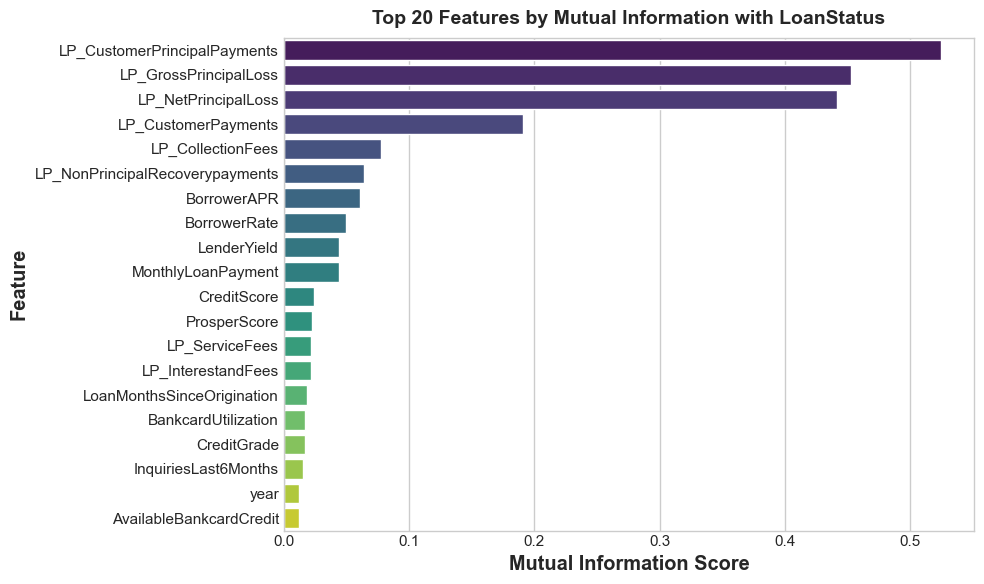

In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# Step 1: Prepare numeric dataset
# -----------------------------
# Select only numeric and boolean columns
X_numeric = X.select_dtypes(include=['number', 'bool']).copy()

# Identify discrete (boolean) features
discrete_features = X_numeric.dtypes == 'bool'

# -----------------------------
# Step 2: Compute Mutual Information Scores
# -----------------------------
mi_scores = mutual_info_regression(X_numeric, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_numeric.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Display top 20 features
print("Top 20 features by Mutual Information Score:\n")
display(mi_scores.head(20))

# -----------------------------
# Step 3: Plot top 20 features
# -----------------------------
top_features = mi_scores.head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 20 Features by Mutual Information with LoanStatus")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


This is a horizontal bar chart showing the "Top 20 Features by Mutual Information with LoanStatus."

This type of chart is used in machine learning for feature selection. It ranks which variables (features) have the strongest relationship with the target variable (LoanStatus). A higher "Mutual Information Score" means the feature is more predictive.

⚠️ Key Observation: Data Leakage
This chart reveals a classic problem called data leakage (or target leakage).

Leaky Features: The top features with extremely high scores are LP_CustomerPrincipalPayments, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, and LP_CustomerPayments.

The Problem: These are not features you would know before giving someone a loan. They describe what happened after the loan was active—how much the customer paid, how much was lost, etc. They are essentially describing the outcome.

These features must be removed from any predictive model. Using them would create a model that looks perfect during testing but is useless in the real world because it relies on information from the future.

Legitimate Features
The "real" predictive features are further down the list. These are variables that a lender would know at the time of the loan application:

BorrowerAPR

BorrowerRate

LenderYield

MonthlyLoanPayment

CreditScore

ProsperScore

BankcardUtilization

CreditGrade

InquiriesLast6Months

These features have lower scores (as expected), but they are the actual, legitimate predictors you would use to build a model.

In [615]:
mi=mi_scores.index[:15].tolist()

In [616]:
mi

['LP_CustomerPrincipalPayments',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_CustomerPayments',
 'LP_CollectionFees',
 'LP_NonPrincipalRecoverypayments',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'MonthlyLoanPayment',
 'CreditScore',
 'ProsperScore',
 'LP_ServiceFees',
 'LP_InterestandFees',
 'LoanMonthsSinceOrigination']

In [618]:
# Select only numeric columns
X_numeric = X.select_dtypes(include=['number']).copy()

# Replace negative values with 0
X_numeric[X_numeric < 0] = 0

# If needed, update the original X with numeric values
X.update(X_numeric)


In [620]:
X_numeric = X.select_dtypes(include=['number']).copy()

In [621]:
X_numeric[X_numeric < 0] = 0

In [622]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X_numeric, y)

df_scores = pd.DataFrame(fit.scores_, columns=['importance'])
df_columns = pd.DataFrame(X_numeric.columns, columns=['column'])
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.sort_values(by='importance', ascending=False, inplace=True)

# Show top 10 features
feature_scores.head(10)


,column,importance
32,LP_GrossPrincipalLoss,1.422394e+08
33,LP_NetPrincipalLoss,1.382514e+08
28,LP_CustomerPrincipalPayments,4.649441e+07
27,LP_CustomerPayments,3.636252e+07
19,AvailableBankcardCredit,2.511565e+07
34,LP_NonPrincipalRecoverypayments,5.177061e+06
23,StatedMonthlyIncome,1.036126e+06
25,LoanOriginalAmount,5.766021e+05
29,LP_InterestandFees,3.877649e+04
26,MonthlyLoanPayment,2.650682e+04


In [623]:
fs=feature_scores["column"][:10].tolist()

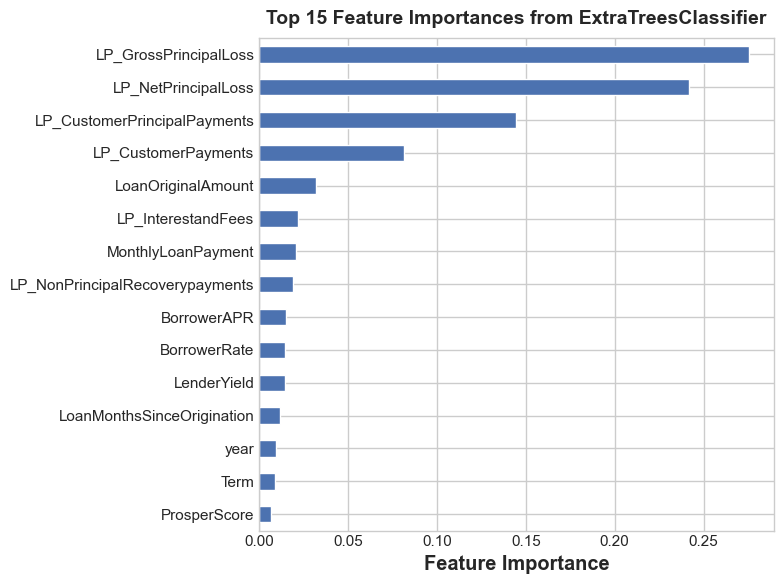

In [626]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Keep only numeric and boolean columns
X_numeric = X.select_dtypes(include=['number', 'bool']).copy()

# Step 2: Replace negative values with 0 (ExtraTrees can handle negative, but chi2 and other metrics cannot)
X_numeric[X_numeric < 0] = 0

# Step 3: Initialize and fit ExtraTreesClassifier
extra = ExtraTreesClassifier(random_state=0)
extra.fit(X_numeric, y)

# Step 4: Extract feature importances
importances = pd.Series(extra.feature_importances_, index=X_numeric.columns)

# Step 5: Plot top 15 features
plt.figure(figsize=(8,6))
importances.nlargest(15).plot(kind="barh")
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances from ExtraTreesClassifier")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


This is a horizontal bar chart showing the "Top 15 Feature Importances from ExtraTreesClassifier."

This chart shows which features the ExtraTreesClassifier model found to be the most predictive when classifying LoanStatus. A higher "Feature Importance" score means the model relied on that feature more to make its decisions.

⚠️ Key Observation: Data Leakage Confirmed
This chart confirms the data leakage problem seen in the previous Mutual Information plot.

Leaky Features: The top features with the highest importance scores are all variables that describe the loan's outcome after it has been active:

LP_GrossPrincipalLoss

LP_NetPrincipalLoss

LP_CustomerPrincipalPayments

LP_CustomerPayments

Why this is a problem: The model is essentially "cheating." It has learned that the best way to predict if a loan was a "loss" is to look at the LP_GrossPrincipalLoss feature, which is circular reasoning.

Legitimate Features
The chart also shows the most important legitimate features (those known at the time of application), which the model ranked below the leaky ones:

LoanOriginalAmount

MonthlyLoanPayment

BorrowerAPR

BorrowerRate

LenderYield

LoanMonthsSinceOrigination

ProsperScore

To build a valid, real-world model, the leaky features must be removed so the model can learn from only the legitimate predictors.

In [627]:
importances=importances.sort_values( axis=0, ascending=False)

In [628]:
im=importances[0:15].index.tolist()

In [629]:
features=set(mi+fs+im)
features

{'AvailableBankcardCredit',
 'BorrowerAPR',
 'BorrowerRate',
 'CreditScore',
 'LP_CollectionFees',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_GrossPrincipalLoss',
 'LP_InterestandFees',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'LP_ServiceFees',
 'LenderYield',
 'LoanMonthsSinceOrigination',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'ProsperScore',
 'StatedMonthlyIncome',
 'Term',
 'year'}

In [630]:
# Step 1: Select features for PCA
features_PCA = [
    'LoanOriginalAmount',
    'BorrowerRate',
    'MonthlyLoanPayment',
    'CreditScore',
    'ProsperScore',
    'year',
    'Term',
    'DebtToIncomeRatio'
]

# Step 2: Subset X for these features
X_scaled = X[features_PCA].copy()

# Step 3: Standardize features (mean=0, std=1)
X_scaled = (X_scaled - X_scaled.mean()) / X_scaled.std()

# Step 4: Verify
X_scaled.head()


,LoanOriginalAmount,BorrowerRate,MonthlyLoanPayment,CreditScore,ProsperScore,year,Term,DebtToIncomeRatio
0,0.549486,-0.551919,0.523627,-0.640438,-0.055755,-1.283793,-0.168599,-0.170807
1,-1.048548,-0.861147,-1.068172,-0.640438,-0.055755,-1.283793,-0.168599,-0.023695
2,-0.479515,-0.727754,-0.512314,-0.040701,-1.192500,1.644248,-0.168599,-0.156096
3,-0.479515,1.384693,-0.317404,0.259167,-0.624127,1.156242,-0.168599,0.299953
4,-0.669193,0.048346,-0.645134,-0.940306,-0.055755,-1.283793,-0.168599,-0.288497


In [632]:
X_scaled.isnull().sum()

LoanOriginalAmount    0
BorrowerRate          0
MonthlyLoanPayment    0
CreditScore           0
ProsperScore          0
year                  0
Term                  0
DebtToIncomeRatio     0
dtype: int64

In [633]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features_PCA])

In [638]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=features_PCA
)
loadings

,PC1,PC2,PC3,PC4,PC5
LoanOriginalAmount,0.553211,0.291682,-0.247903,-0.132126,0.134133
BorrowerRate,-0.377257,0.525224,-0.058730,-0.094327,-0.055877
MonthlyLoanPayment,0.513272,0.292518,-0.343510,-0.216767,-0.102319
CreditScore,0.448461,-0.104911,0.366955,0.190860,-0.347147
ProsperScore,0.269466,-0.488956,0.183390,0.100896,0.280083
year,0.079807,0.397477,0.601462,0.144302,-0.397762
Term,0.089917,0.373363,0.335251,0.252504,0.772156
DebtToIncomeRatio,0.001981,0.077604,-0.417922,0.891890,-0.122555


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

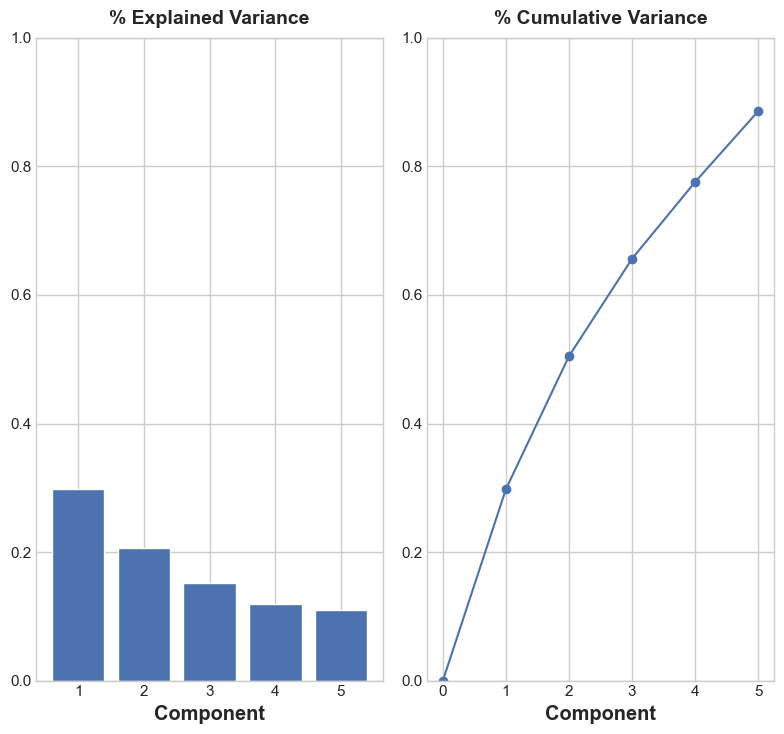

In [639]:
plot_variance(pca)

his image displays two charts related to a Principal Component Analysis (PCA). These plots are used to decide how many principal components (new, combined features) are needed to represent the original data.

Left Chart: % Explained Variance (Scree Plot)
This bar chart shows how much of the dataset's total variance each individual principal component explains.

Component 1: Explains the most variance, about 30%.

Component 2: Explains the next most, about 21%.

Component 3: Explains about 15%.

Component 4: Explains about 12%.

Component 5: Explains about 11%.

Right Chart: % Cumulative Variance
This line plot shows the total variance explained as you add components together.

1 Component: Explains ~30% of the total variance.

2 Components: Cumulatively explain ~51% (30% + 21%).

3 Components: Cumulatively explain ~66%.

4 Components: Cumulatively explain ~78%.

5 Components: Cumulatively explain almost 90% (around 89%) of the total variance.

Key Takeaway: These charts show that you can reduce the dataset to 5 principal components and still retain almost 90% of the original information (variance).

In [640]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.053717
PC6    0.024756
PC5    0.022537
PC1    0.017834
PC8    0.017782
PC3    0.014230
PC4    0.012827
PC7    0.008147
Name: MI Scores, dtype: float64

In [ ]:
# Make sure features is a list
features = list(features)  # just in case it was a set

# Join PCA components to original features
X_PCA = X[features].join(X_pca[['PC2', 'PC5', 'PC6', 'PC8']])

In [645]:
model_after_pca = RandomForestClassifier(random_state=0)
model_after_pca_score = cross_val_score(
    model_after_pca, X_PCA, y, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)
model_after_pca_score = 100*model_after_pca_score.mean()

print(f"Accuracy Score: {model_after_pca_score:.6}%")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Accuracy Score: 99.4713%


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


# **Modeling**

In [646]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, y, test_size=0.20, random_state=100)
print(X_PCA.shape, X_train.shape, X_test.shape)


(49554, 24) (39643, 24) (9911, 24)


In [647]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

 **logistic Regression**

In [648]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty='l2')
# training the model
model_1.fit(X_train_std, Y_train)

y_pred = model_1.predict(X_test_std)
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_lr * 100))

Accuracy: 98.97%


 **Random Forest Classifier**

In [649]:
model_2 = RandomForestClassifier(random_state=0)
model_2.fit(X_train_std, Y_train)
y_pred = model_2.predict(X_test_std)
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

Accuracy: 99.53%


In [650]:
print("Accuracy from logistig regression: {:.2f}%".format(accuracy_lr * 100))
print("Accuracy from radnom forest: {:.2f}%".format(accuracy_rf * 100))

Accuracy from logistig regression: 98.97%
Accuracy from radnom forest: 99.53%


In [653]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(39643, 24) (9911, 24)
(39643,) (9911,)


In [654]:
print(y_pred.shape)

(9911,)


In [655]:
y_pred_lr = model_1.predict(X_test_std)  # same length as Y_test

In [657]:
y_pred_rf = model_2.predict(X_test)     # same length as Y_test


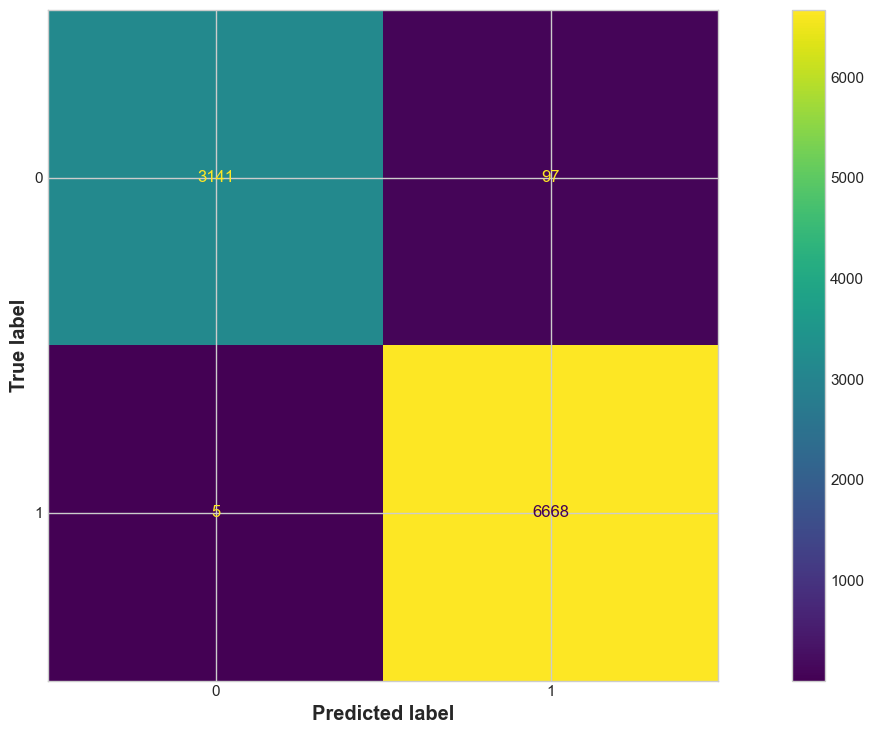

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred_lr)  # or y_pred_rf
ConfusionMatrixDisplay(cm).plot()

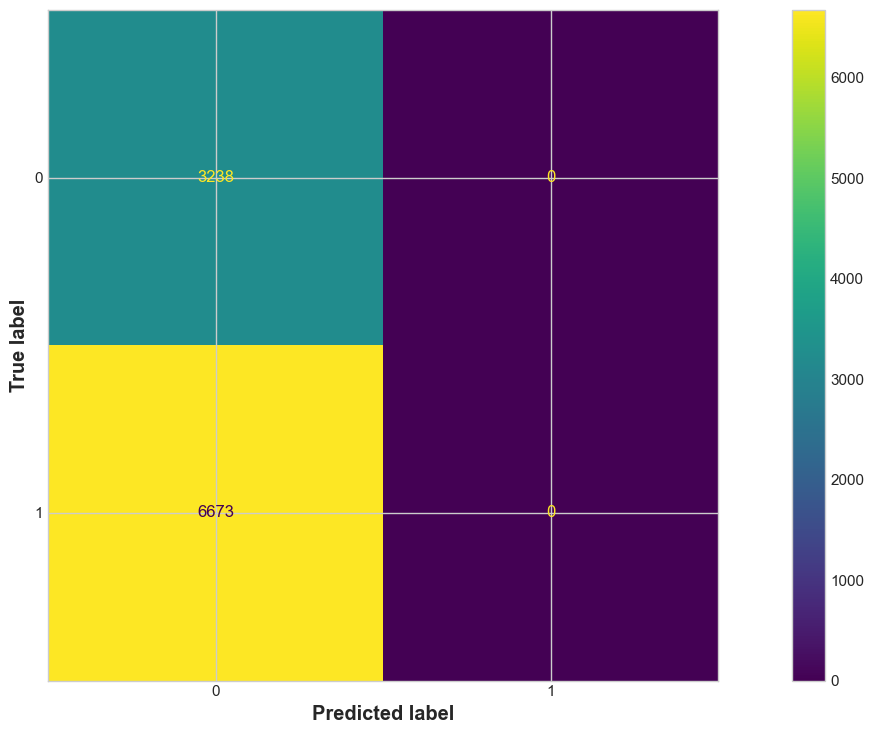

In [660]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred_rf )  # or y_pred_rf
ConfusionMatrixDisplay(cm).plot()

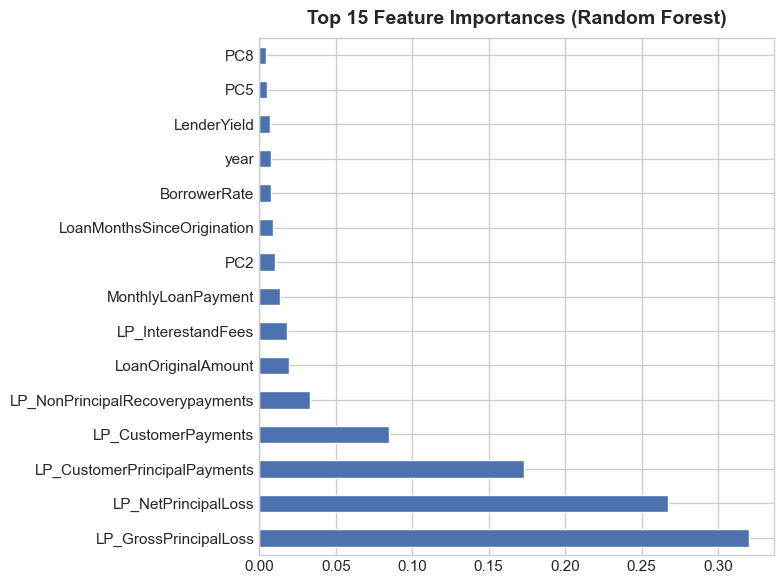

In [663]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model_2.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


### 3 New Taret Variables + MultiRegression Model

#### ELA (Exploratory Learning Analysis)

In [664]:
data = pd.read_csv(r'C:\Users\sujen\OneDrive\Desktop\Internship\Risk_Analysis\Dataset\prosperLoanData.csv')
df = loan_data_historical.copy()

In [665]:
df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CreditScore', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month',
       'YearsWithCredit', 

In [666]:
columns_to_keep = [
    'CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate',
    'LenderYield', 'ProsperScore', 'EmploymentStatus',
    'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
    'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
    'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance',
    'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
    'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
    'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
    'LoanOriginalAmount', 'MonthlyLoanPayment',
    'LP_CustomerPrincipalPayments', 'LP_ServiceFees',
    'Investors', 'MediumWage'
]

df = df.reindex(columns=columns_to_keep)


In [667]:
columns_to_keep = [
    'CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate',
    'LenderYield', 'ProsperScore', 'EmploymentStatus',
    'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
    'OpenRevolvingAccounts','InquiriesLast6Months', 'TotalInquiries',
    'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
    'TradesNeverDelinquent (percentage)','DebtToIncomeRatio',
    'IncomeVerifiable', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'MonthlyLoanPayment',
    'LP_CustomerPrincipalPayments', 'LP_ServiceFees'
]

df = df.reindex(columns=columns_to_keep)


In [668]:
df.shape

(49554, 24)

In [669]:
df_new = df[df['IncomeVerifiable']==True]
print(df_new.shape)
print(df.shape[0]-df_new.shape[0])

(45161, 24)
4393


In [670]:
df_new['TotalPayment'] = df_new['LoanOriginalAmount'] + (df_new['LoanOriginalAmount'] * df_new['BorrowerRate']) *  df_new['Term']

In [671]:
df_new['TotalPayment']

0         63034.4000
1          5770.0000
2         24664.0000
3         49748.8000
4         25410.0000
            ...     
49549     14783.3648
49550     15672.8000
49551     26251.0000
49552      9992.0000
49553    249450.0000
Name: TotalPayment, Length: 45161, dtype: float64

In [672]:
df_new['MaxAllow'] = df_new['StatedMonthlyIncome'] * 12 * 0.3

In [673]:
df_new['ELA'] = df_new.apply(lambda row: row['LoanOriginalAmount'] if row['TotalPayment'] <= row['MaxAllow'] else row['MaxAllow'], axis=1)

In [674]:
df_new['ELA']

0        11099.999999
1         1000.000000
2         8700.000001
3        19800.000000
4        13500.000000
             ...     
49549     4292.000000
49550     8399.999999
49551    15599.999999
49552     2000.000000
49553    13950.000000
Name: ELA, Length: 45161, dtype: float64

In [675]:
df_new['CreditGrade'].head(20)

0     3
1     3
2     7
3     7
4     4
5     7
6     7
7     7
8     7
9     7
10    3
11    7
12    3
13    4
14    4
15    7
16    5
17    7
18    7
19    7
Name: CreditGrade, dtype: int64

In [676]:
df_new.drop(columns=['TotalPayment','MaxAllow'],inplace = True)

In [677]:
df_new.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate', 'LenderYield',
       'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CreditScore', 'CurrentCreditLines', 'OpenRevolvingAccounts',
       'InquiriesLast6Months', 'TotalInquiries', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_ServiceFees',
       'ELA'],
      dtype='object')

#### ROI

In [678]:
def PROI(df):
    # Step 1: calculate interest, total amount, ROI
    df['InterestAmount'] = df['LoanOriginalAmount'] * df['BorrowerRate']
    df['TotalAmount'] = df['LoanOriginalAmount'] + df['InterestAmount']
    df['ROI'] = df['InterestAmount'] / df['TotalAmount']
    
    # Step 2: initialize PROI as median ROI
    df['PROI'] = df['ROI'].median()
    
    # Step 3: adjust PROI based on CreditGrade
    df.loc[df['CreditGrade'].isin(['E', 'HR']), 'PROI'] += 0.05
    df.loc[df['CreditGrade'] == 'A', 'PROI'] -= 0.05
    df.loc[df['CreditGrade'] == 'AA', 'PROI'] -= 0.1
    
    # Step 4: adjust based on TradesNeverDelinquent
    df.loc[df['TradesNeverDelinquent (percentage)'] < 0.7, 'PROI'] += 0.05
    
    # Step 5: adjust based on AvailableBankcardCredit
    df.loc[df['AvailableBankcardCredit'] <= 800, 'PROI'] += 0.05
    df.loc[df['AvailableBankcardCredit'] >= 16500, 'PROI'] -= 0.05
    
    # Step 6: adjust based on TotalInquiries
    df.loc[df['TotalInquiries'] > 28, 'PROI'] += 0.1
    df.loc[(df['TotalInquiries'] > 12) & (df['TotalInquiries'] <= 28), 'PROI'] += 0.05
    
    return df['PROI']

# Usage:
df_new['PROI'] = PROI(df_new)
df_new['PROI']

0        0.161496
1        0.211496
2        0.161496
3        0.211496
4        0.211496
           ...   
49549    0.111496
49550    0.161496
49551    0.211496
49552    0.161496
49553    0.161496
Name: PROI, Length: 45161, dtype: float64

In [679]:
print(df_new.columns)

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate', 'LenderYield',
       'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CreditScore', 'CurrentCreditLines', 'OpenRevolvingAccounts',
       'InquiriesLast6Months', 'TotalInquiries', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_ServiceFees',
       'ELA', 'InterestAmount', 'TotalAmount', 'ROI', 'PROI'],
      dtype='object')


In [680]:
import numpy as np

P = df_new['LoanOriginalAmount']         # Principal
r = df_new['BorrowerRate'] / 12          # Monthly interest rate
n = df_new['Term']                        # Term in months

# EMI formula
df_new['EMI'] = (P * r * ((1 + r) ** n)) / (((1 + r) ** n) - 1)

# Optional: handle zero-interest loans
df_new.loc[r == 0, 'EMI'] = P / n

# Summary statistics
print(df_new['EMI'].describe())


count    45161.000000
mean       238.159326
std        185.710699
min         27.777778
25%        111.689565
50%        176.081530
75%        315.594766
max       2251.506148
Name: EMI, dtype: float64


In [681]:
df_new[['PROI','ELA','EMI']].head()

,PROI,ELA,EMI
0,0.161496,11099.999999,330.425160
1,0.211496,1000.000000,33.814494
2,0.161496,8700.000001,137.391471
3,0.211496,19800.000000,173.707316
4,0.211496,13500.000000,112.640489


In [682]:
df_new.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate', 'LenderYield',
       'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CreditScore', 'CurrentCreditLines', 'OpenRevolvingAccounts',
       'InquiriesLast6Months', 'TotalInquiries', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_ServiceFees',
       'ELA', 'InterestAmount', 'TotalAmount', 'ROI', 'PROI', 'EMI'],
      dtype='object')

In [683]:
#X = df_new.iloc[:,:-6]
y_1 = df_new[['LoanStatus']]
y_2 = df_new[['PROI','ELA','EMI']]
y = df_new[['PROI','ELA','EMI','LoanStatus']]
df_new.drop(columns='LoanStatus',inplace=True)
X = df_new.iloc[:,:-6]

In [684]:
X.head()

,CreditGrade,Term,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CreditScore,CurrentCreditLines,OpenRevolvingAccounts,...,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
0,3,36,0.1580,0.1380,6,1,1,640.0,5.0,1,...,1500.0,11.0,0.81,0.17,True,3083.333333,9425,330.43,9425.00,-133.18
1,3,36,0.1325,0.1225,6,1,0,640.0,2.0,1,...,2580.0,7.0,0.40,0.27,True,1666.666667,1000,33.81,1000.00,-0.88
2,7,36,0.1435,0.1335,4,1,0,680.0,9.0,8,...,3626.0,20.0,1.00,0.18,True,2416.666667,4000,137.39,88.64,-3.40
3,7,36,0.3177,0.3077,5,0,1,700.0,10.0,5,...,178.0,17.0,0.94,0.49,True,5500.000000,4000,173.71,209.75,-9.81
4,4,36,0.2075,0.1975,6,1,0,620.0,4.0,3,...,1366.0,6.0,0.37,0.09,True,3750.000000,3000,112.64,3000.00,-51.12


In [685]:
y.head()

,PROI,ELA,EMI,LoanStatus
0,0.161496,11099.999999,330.425160,1
1,0.211496,1000.000000,33.814494,1
2,0.161496,8700.000001,137.391471,0
3,0.211496,19800.000000,173.707316,0
4,0.211496,13500.000000,112.640489,1


In [686]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 49553
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         45161 non-null  int64  
 1   Term                                45161 non-null  int64  
 2   BorrowerRate                        45161 non-null  float64
 3   LenderYield                         45161 non-null  float64
 4   ProsperScore                        45161 non-null  int64  
 5   EmploymentStatus                    45161 non-null  int64  
 6   IsBorrowerHomeowner                 45161 non-null  int64  
 7   CreditScore                         45161 non-null  float64
 8   CurrentCreditLines                  45161 non-null  float64
 9   OpenRevolvingAccounts               45161 non-null  int64  
 10  InquiriesLast6Months                45161 non-null  float64
 11  TotalInquiries                      45161 non-

In [687]:
y_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 49553
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LoanStatus  45161 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [688]:
y_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 49553
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PROI    45161 non-null  float64
 1   ELA     45161 non-null  float64
 2   EMI     45161 non-null  float64
dtypes: float64(3)
memory usage: 2.4 MB


In [689]:
y_1.describe()

,LoanStatus
count,45161.000000
mean,0.680565
std,0.466263
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [690]:
y_2.describe()

,PROI,ELA,EMI
count,45161.000000,45161.000000,45161.000000
mean,0.183403,14926.351195,238.159326
std,0.050085,11401.229705,185.710699
min,0.111496,0.000000,27.777778
25%,0.161496,7499.999999,111.689565
50%,0.161496,13050.000000,176.081530
75%,0.211496,19649.999999,315.594766
max,0.361496,253260.000000,2251.506148


In [691]:
y_2.fillna(0,inplace=True)
y.fillna(0,inplace=True)


In [692]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [694]:
ffrom sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold
import numpy as np

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Ensure target variable is numeric and 1D
y_2 = np.array(y_2).ravel()

# Initialize model
model = LinearRegression()

# Cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model, X_imputed, y_2, 
    scoring='neg_mean_absolute_error', 
    cv=cv, n_jobs=-1
)

# Convert negative MAE to positive
n_scores = np.abs(n_scores)

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


SyntaxError: invalid syntax (1126258265.py, line 1)

In [287]:
# create datasets
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=15, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y_2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 169.253 (25.163)


# **Pipeline**

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
y_train.head()

,PROI,ELA,EMI,LoanStatus
27957,0.161496,1500.000000,45.632906,1
1057,0.211496,17100.000000,285.738953,1
571,0.211496,42000.000001,201.426469,1
9887,0.161496,839.999999,174.195409,1
39598,0.161496,22500.000000,329.760064,1


In [696]:
yStatus_train = y_train.iloc[:,3]
yPROI_train = y_train.iloc[:,0]
yELA_train = y_train.iloc[:,1]
yEMI_train = y_train.iloc[:,2]

yStatus_test = y_test.iloc[:,3]
yPROI_test = y_test.iloc[:,0]
yELA_test = y_test.iloc[:,1]
yEMI_test = y_test.iloc[:,2]

yVar_train = y_train.iloc[:,0:3]
yVar_test =  y_test.iloc[:,0:3]

# **Classification**

In [697]:
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=6)

In [698]:
qda = QuadraticDiscriminantAnalysis()

rf = RandomForestClassifier(random_state=0)

LR = LogisticRegression(penalty='l2')

reg = DecisionTreeRegressor()

In [699]:
estimators = [('QDA', qda), ('RandomForest', rf), ("logistic",LR)]
final_estimator = GradientBoostingClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [700]:
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', clf)
])

In [701]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Create a pipeline that handles missing values
model_ensemble = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill NaNs with column mean
    ('scaler', StandardScaler()),                 # Standardize features
    ('pca', PCA(n_components=5)),                # Reduce dimensionality
    ('clf', RandomForestClassifier(random_state=0))  # Your classifier
])

# Step 2: Fit the pipeline
model_ensemble.fit(X_train, yStatus_train)

# Step 3: Predict and evaluate
pred = model_ensemble.predict(X_test)
print('test accuracy = ', round(accuracy_score(yStatus_test, pred)*100, 2), '%')


test accuracy =  69.82 %


In [702]:
print(classification_report(yStatus_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.535     0.322     0.402      2845
           1      0.736     0.871     0.798      6188

    accuracy                          0.698      9033
   macro avg      0.636     0.596     0.600      9033
weighted avg      0.673     0.698     0.673      9033



# **Regression**

In [703]:
columns = [
    'CreditGrade', 'Term', 'BorrowerAPR', 'BorrowerRate',
    'LenderYield', 'ProsperScore', 'EmploymentStatus',
    'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
    'OpenCreditLines', 'TotalCreditLinespast7years',
    'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
    'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance',
    'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
    'TradesNeverDelinquent', 'DebtToIncomeRatio', 'IncomeVerifiable',
    'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
    'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
    'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
    'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
    'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month',
    'YearsWithCredit', 'LowWage', 'MediumWage', 'HighWage'
]


In [704]:
missing = [c for c in columns if c not in df.columns]
print("Missing columns:", missing)

Missing columns: ['BorrowerAPR', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance', 'TradesNeverDelinquent', 'LoanMonthsSinceOrigination', 'LP_CustomerPayments', 'LP_InterestandFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month', 'YearsWithCredit', 'LowWage', 'MediumWage', 'HighWage']


In [705]:
columns_to_drop = [
    'CreditScore', 'TradesNeverDelinquent', 'LoanMonthsSinceOrigination',
    'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees',
    'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss',
    'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'YearsWithCredit',
    'LowWage', 'MediumWage', 'HighWage'
]

df = df.drop(columns=columns_to_drop, errors='ignore')


In [706]:
missing_cols = [col for col in columns if col not in df.columns]
print("Missing columns:", missing_cols)


Missing columns: ['BorrowerAPR', 'CreditScore', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance', 'TradesNeverDelinquent', 'LoanMonthsSinceOrigination', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month', 'YearsWithCredit', 'LowWage', 'MediumWage', 'HighWage']


In [707]:
model_reg = Pipeline([
    ('reg', reg)
])

In [708]:
model_reg.fit(X_train, yVar_train)
pred = model_reg.predict(X_test)
mse = mean_absolute_error(yVar_test, pred)
print('test mean absolute error = ', mse)

test mean absolute error =  203.1757130155746


In [709]:
X = df[[col for col in columns if col in df.columns]]

In [710]:
print(X.shape)
print(y.shape)


(49554, 19)
(45161, 4)


In [711]:
print(type(y))        # See if it's DataFrame or Series
print(y.shape)        # Check number of columns


<class 'pandas.core.frame.DataFrame'>
(45161, 4)


In [712]:
# Suppose your target column is 'LoanStatus'
y = y['LoanStatus']  # now y is a Series
print(type(y))       # <class 'pandas.core.series.Series'>
print(y.name)        # 'LoanStatus'

<class 'pandas.core.series.Series'>
LoanStatus


In [713]:
# Combine X and y temporarily
df_model = pd.concat([X, y], axis=1)

# Drop rows with any NaN
df_model = df_model.dropna()

# Split back into X and y
X_clean = df_model[X.columns]
y_clean = df_model[y.columns] if isinstance(y, pd.DataFrame) else df_model[y.name]

print(X_clean.shape, y_clean.shape)  # should match

# Fit the model
from sklearn.linear_model import LinearRegression
rgrmodel = LinearRegression()


(45161, 19) (45161,)


In [714]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)


In [715]:
rgrmodel.fit(X_train, y_train)

LinearRegression()

In [716]:
y_pred = rgrmodel.predict(X_test)


In [717]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 0.441


In [718]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 0.388
RMSE: 0.441


### Saving Models

In [719]:
# Save the trained model
with open('rgrmodel.pkl', 'wb') as f:
    pickle.dump(rgrmodel, f)

In [720]:
#fill with realistic or placeholder values
X_new = pd.DataFrame([
    [0.16, 7800, 204.4, 700, 3, 1, 0, 0.5, 2000, 1, 5, 0.2, 0.1, 0, 0, 1, 1, 0.5, 1000],
    [0.11, 25500, 809.6, 650, 4, 1, 1, 0.4, 2500, 1, 6, 0.3, 0.2, 1, 0, 1, 1, 0.6, 2000]
], columns=X_clean.columns)

y_pred = rgrmodel.predict(X_new)
print("Predictions:", y_pred)


Predictions: [ 3838.49484009 -2471.98106458]


In [721]:
# Keep only the columns used for training
X_for_prediction = X_clean.copy()  # or any new data


In [722]:
X_for_prediction = X[X_clean.columns]  # select only the 19 columns


In [723]:
X_for_prediction

,CreditGrade,Term,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,InquiriesLast6Months,TotalInquiries,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,3,36,0.1580,0.1380,6,1,1,5.0,1,3.0,3.0,0.00,1500.0,11.0,0.17,True,3083.333333,9425,330.43
1,3,36,0.1325,0.1225,6,1,0,2.0,1,3.0,5.0,0.32,2580.0,7.0,0.27,True,1666.666667,1000,33.81
2,7,36,0.1435,0.1335,4,1,0,9.0,8,1.0,4.0,0.70,3626.0,20.0,0.18,True,2416.666667,4000,137.39
3,7,36,0.3177,0.3077,5,0,1,10.0,5,0.0,1.0,0.97,178.0,17.0,0.49,True,5500.000000,4000,173.71
4,4,36,0.2075,0.1975,6,1,0,4.0,3,0.0,8.0,0.08,1366.0,6.0,0.09,True,3750.000000,3000,112.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49549,1,36,0.0679,0.0579,6,1,1,10.0,7,1.0,9.0,0.72,34415.0,17.0,0.06,True,10333.333333,4292,132.11
49550,7,36,0.1899,0.1799,6,1,0,4.0,2,0.0,2.0,0.00,3746.0,15.0,0.27,True,2333.333333,2000,73.30
49551,7,36,0.2639,0.2539,3,1,0,7.0,7,2.0,19.0,0.11,7537.0,11.0,0.05,True,4333.333333,2500,101.25
49552,7,36,0.1110,0.1010,8,1,1,14.0,9,1.0,4.0,0.69,6658.0,39.0,0.11,True,8041.666667,2000,65.57


In [724]:
X_for_prediction = X_for_prediction.dropna()
y_clean_aligned = y_clean.reindex(X_for_prediction.index)

In [725]:
y_clean_aligned = y_clean.reindex(X_for_prediction.index).dropna()
X_for_prediction = X_for_prediction.loc[y_clean_aligned.index]


In [726]:
common_index = X_for_prediction.index.intersection(y_clean.index)
X_for_prediction = X_for_prediction.loc[common_index]
y_clean_aligned = y_clean.loc[common_index]


In [727]:
missing_indices = X_for_prediction.index.difference(y_clean.index)
print("Missing indices in y_clean:", missing_indices)


Missing indices in y_clean: Index([], dtype='int64')


In [728]:
common_index = X_for_prediction.index.intersection(y_clean.index)

X_aligned = X_for_prediction.loc[common_index]
y_aligned = y_clean.loc[common_index]



In [729]:
from sklearn.tree import DecisionTreeRegressor

# If model is already created but not fitted
model = DecisionTreeRegressor()  # or use the same parameters you had before
model.fit(X_aligned, y_aligned)


DecisionTreeRegressor()

In [730]:
# Make sure X_aligned and y_aligned have matching indices
X_aligned, y_aligned = X.align(y, join='inner', axis=0)

In [731]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model (you can set parameters if needed)
model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_aligned, y_aligned)


DecisionTreeRegressor(random_state=42)

In [732]:
y_pred = model.predict(X_aligned)

In [733]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_aligned, y_pred)
r2 = r2_score(y_aligned, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 0.0
R2 Score: 1.0


In [734]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_aligned, y_aligned, test_size=0.2, random_state=42
)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


Test MSE: 0.3723015609432082
Test R2: -0.7083108158339795


In [735]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=5,          # limit depth
    min_samples_split=10, # require more samples to split
    min_samples_leaf=5,   # require more samples in leaf
    random_state=42
)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


Test MSE: 0.19687547542616365
Test R2: 0.09663418227173115


In [736]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,       # number of trees
    max_depth=None,         # let trees grow fully (or you can limit)
    random_state=42
)


In [737]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [738]:
# Train predictions
y_train_pred = rf_model.predict(X_train)

# Test predictions
y_test_pred = rf_model.predict(X_test)


In [739]:
from sklearn.metrics import mean_squared_error, r2_score

# Train metrics
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

# Test metrics
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


Train MSE: 0.02637946468113375
Train R2: 0.8785815276270101
Test MSE: 0.1910620724011956
Test R2: 0.12330906174093059


In [740]:
from sklearn.model_selection import GridSearchCV


In [741]:
param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees
    'max_depth': [None, 10, 20, 30],      # max depth of trees
    'min_samples_split': [2, 5, 10],      # min samples to split a node
    'min_samples_leaf': [1, 2, 4],        # min samples in leaf
    'max_features': ['auto', 'sqrt', 'log2']  # features considered at each split
}


In [742]:
rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # use all cores
    verbose=2,
    scoring='r2'     # we want best R2
)


In [743]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assume 'best_model' is your trained model
# Example:
best_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
best_model.fit(X_train, y_train)

# Save the model to a file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully as 'trained_model.pkl'.")


Model saved successfully as 'trained_model.pkl'.
